In [2]:
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Standardisation des données
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# PCA
from sklearn.decomposition import PCA

# K-Means
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

# CAH
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# linkage permet le calcul de la matrice de similarité/dissimilarité
# fcluster permet d'appliquer le calcul du CAH avec le nombre de cluster défini

# Score des silhouettes
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import silhouette_score, adjusted_rand_score
# + le score des silhouettes est élevé + les clusters sont éloignés

In [3]:
df_k_means_filtered = pd.read_csv("cleaning_df2.csv")
df_k_means_filtered.head()

Zone  Exportations en kg  population_2017   
0      Afrique du Sud          63000000.0       57009756.0  \
1             Albanie                 0.0        2884169.0   
2             Algérie                 0.0       41389189.0   
3           Allemagne         646000000.0       82658409.0   
4  Antigua-et-Barbuda                 0.0          95426.0   

   indice_stabilite_politique_2017  Valeur US $ par habitant        TAS   
0                            -0.28               6723.928582  78.706327  \
1                             0.38               4521.752217  25.490196   
2                            -0.92               4134.936055  99.277978   
3                             0.59              44670.222282  88.538012   
4                             0.75              16110.556281   0.000000   

          TDI  Consommation_moyenne_poulet_en_kg  
0   23.567171                          37.151536  
1   74.509804                          17.682736  
2    0.722022                           6.692569  
3   35.738540                          20.687550  
4  100.000000                          73.355270

In [4]:
df_k_means_filtered.shape

(105, 8)

In [5]:
df_k_means_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Zone                               105 non-null    object 
 1   Exportations en kg                 105 non-null    float64
 2   population_2017                    105 non-null    float64
 3   indice_stabilite_politique_2017    105 non-null    float64
 4   Valeur US $ par habitant           105 non-null    float64
 5   TAS                                105 non-null    float64
 6   TDI                                105 non-null    float64
 7   Consommation_moyenne_poulet_en_kg  105 non-null    float64
dtypes: float64(7), object(1)
memory usage: 6.7+ KB


In [6]:
df_k_means_filtered = df_k_means_filtered.set_index('Zone')
df_k_means_filtered.head(2)

Exportations en kg  population_2017   
Zone                                                  
Afrique du Sud          63000000.0       57009756.0  \
Albanie                        0.0        2884169.0   

                indice_stabilite_politique_2017  Valeur US $ par habitant   
Zone                                                                        
Afrique du Sud                            -0.28               6723.928582  \
Albanie                                    0.38               4521.752217   

                      TAS        TDI  Consommation_moyenne_poulet_en_kg  
Zone                                                                     
Afrique du Sud  78.706327  23.567171                          37.151536  
Albanie         25.490196  74.509804                          17.682736

In [7]:
df_k_means_filtered.shape

(105, 7)

In [8]:
X_df = df_k_means_filtered.copy()
X_df.head(3)

Exportations en kg  population_2017   
Zone                                                  
Afrique du Sud          63000000.0       57009756.0  \
Albanie                        0.0        2884169.0   
Algérie                        0.0       41389189.0   

                indice_stabilite_politique_2017  Valeur US $ par habitant   
Zone                                                                        
Afrique du Sud                            -0.28               6723.928582  \
Albanie                                    0.38               4521.752217   
Algérie                                   -0.92               4134.936055   

                      TAS        TDI  Consommation_moyenne_poulet_en_kg  
Zone                                                                     
Afrique du Sud  78.706327  23.567171                          37.151536  
Albanie         25.490196  74.509804                          17.682736  
Algérie         99.277978   0.722022                           6.692569

*************

1° Standardisation des données

<font color='lightblue'>Avons-nous un intérêt à normaliser les variables quantitatives ?

La normalisation facilite l’apprentissage des modèles de Machine Learning qui sont basés sur la descente du gradient, les calculs de distance ou les calculs de variance.
La normalisation égalise le poids de chaque dimension dans le but d’éviter que les variables ayant de grandes valeurs  soient considérées plus importantes que les variables ayant des valeurs moins grandes, d’où l’importance de l’application au préalable de certains algorithmes de clustering.
La normalisation standardise la moyenne et l’écart-type de tout type de distribution de données, ce qui permet de simplifier le problème d’apprentissage en s’affranchissant de ces deux paramètres.

=> permet aux algorithmes de Machine Learning de converger plus rapidement vers la solution et optimiser la précision de notre modèle

</font>

Séparation des données, X la matrice des données

In [9]:
X = X_df.values
X[:5]

array([[ 6.30000000e+07,  5.70097560e+07, -2.80000000e-01,
         6.72392858e+03,  7.87063267e+01,  2.35671710e+01,
         3.71515360e+01],
       [ 0.00000000e+00,  2.88416900e+06,  3.80000000e-01,
         4.52175222e+03,  2.54901961e+01,  7.45098039e+01,
         1.76827363e+01],
       [ 0.00000000e+00,  4.13891890e+07, -9.20000000e-01,
         4.13493606e+03,  9.92779783e+01,  7.22021661e-01,
         6.69256892e+00],
       [ 6.46000000e+08,  8.26584090e+07,  5.90000000e-01,
         4.46702223e+04,  8.85380117e+01,  3.57385399e+01,
         2.06875504e+01],
       [ 0.00000000e+00,  9.54260000e+04,  7.50000000e-01,
         1.61105563e+04,  0.00000000e+00,  1.00000000e+02,
         7.33552701e+01]])

In [10]:
type(X)

numpy.ndarray

In [11]:
X.shape

(105, 7)

In [63]:
pays = X_df.index
len(pays)

105

In [13]:
features = X_df.columns
features

Index(['Exportations en kg', 'population_2017',
       'indice_stabilite_politique_2017', 'Valeur US $ par habitant', 'TAS',
       'TDI', 'Consommation_moyenne_poulet_en_kg'],
      dtype='object')

Scaling des données et instanciation du scaler :

In [14]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[:5]

array([[ 0.16740387,  0.58651667, -0.43251121, -0.51913174,  0.05263646,
        -0.20133749,  0.63528068],
       [-0.43377854, -0.56398883,  0.37604091, -0.63944952, -1.51567624,
         1.44126079, -0.5622678 ],
       [-0.43377854,  0.25448243, -1.21656176, -0.66058355,  0.65889592,
        -0.93795829, -1.23828576],
       [ 5.73072677,  1.13171014,  0.63330749,  1.55409623,  0.34238237,
         0.19111709, -0.3774382 ],
       [-0.43377854, -0.62326697,  0.82932013, -0.00628537, -2.26688829,
         2.26316868,  2.8622144 ]])

In [15]:
idx = ["mean", "std"]

pd.DataFrame(X_norm).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0

2° Déterminer le nombre de Clusters :

=> Méthode du coude ("Elbow Method")

=> Calcul du coefficient de silhouette : mesure la cohésion et la séparation des clusters il varie de -1 à 1. Une valeur plus proche de 1 indique une bonne séparation des clusters.


C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

167.92918042522803


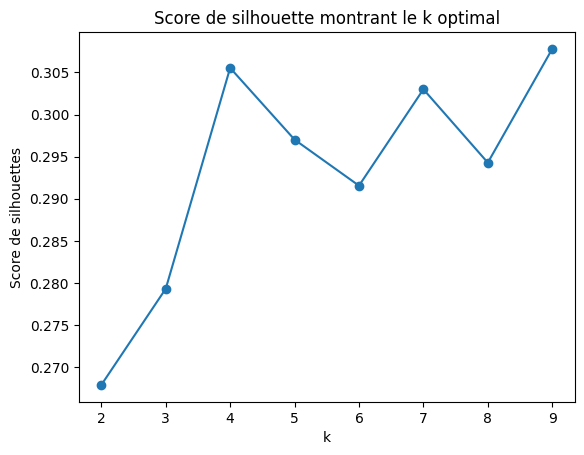

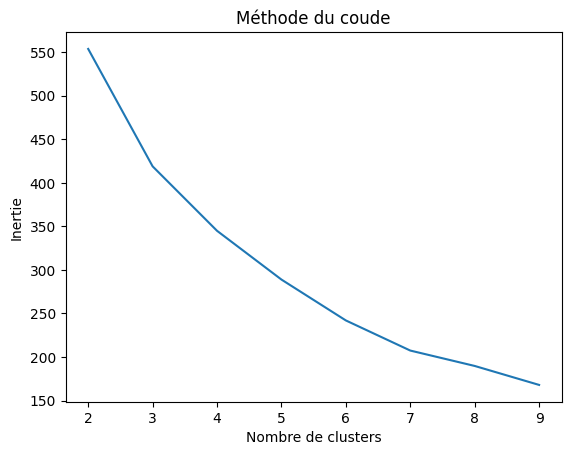

In [17]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertia = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(X_norm)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_norm, kmeans.labels_))

print(kmeans.inertia_)
#print(silhouettes)

# graphique du score de silhouette
plt.plot(range(2, 10), silhouettes, marker='o')
plt.xlabel("k")
plt.ylabel("Score de silhouettes")
plt.title("Score de silhouette montrant le k optimal")
plt.show()

# diagramme du coude
plt.plot(range(2,10), inertia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.show()

=> Privilégier 3 à 4 clusters où le coefficient de silhouettes est le plus élevé

K-Means

=> Appliquer KMeans avec le nombre de clusters optimal trouvé

In [25]:
# instancier et entrainer notre k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_norm)

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

- Labels

In [26]:
labels = kmeans.labels_ # kmeans.predict(X_norm)
labels

array([0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0,
       1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2])

- Centroïdes

In [27]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.15648222,  0.66665808, -1.0346015 , -0.65939259,  0.52181792,
        -0.69702853, -0.68212825],
       [ 0.30618614, -0.22355266,  0.67085883,  0.63742426,  0.47319993,
        -0.34549699,  0.41218445],
       [-0.35056667, -0.4953181 ,  0.1726778 , -0.27608672, -1.58036024,
         1.58367328,  0.16927502]])

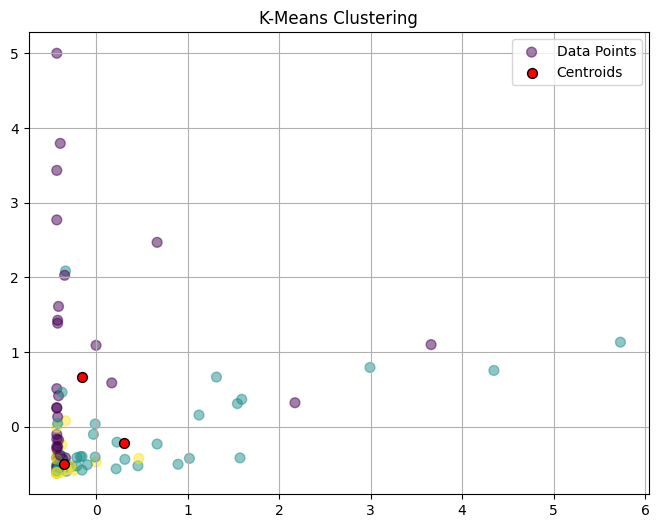

In [28]:
# Tracer les clusters et leurs centroïdes
plt.figure(figsize=(8, 6))

# Tracer les points de données
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5, label='Data Points')

# Tracer les centroïdes
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', c='red', s=200, edgecolors='k', label='Centroids')

plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
X_df['labels_kmeans']=labels # rajout colonne labels
X_df

Exportations en kg  population_2017   
Zone                                                       
Afrique du Sud               63000000.0       57009756.0  \
Albanie                             0.0        2884169.0   
Algérie                             0.0       41389189.0   
Allemagne                   646000000.0       82658409.0   
Antigua-et-Barbuda                  0.0          95426.0   
...                                 ...              ...   
Zambie                        1000000.0       16853599.0   
Égypte                        1000000.0       96442591.0   
Émirats arabes unis          94000000.0        9487203.0   
Équateur                            0.0       16785361.0   
Îles Salomon                        0.0         636039.0   

                     indice_stabilite_politique_2017   
Zone                                                   
Afrique du Sud                                 -0.28  \
Albanie                                         0.38   
Algérie                                        -0.92   
Allemagne                                       0.59   
Antigua-et-Barbuda                              0.75   
...                                              ...   
Zambie                                          0.15   
Égypte                                         -1.42   
Émirats arabes unis                             0.62   
Équateur                                       -0.07   
Îles Salomon                                    0.20   

                     Valeur US $ par habitant         TAS         TDI   
Zone                                                                    
Afrique du Sud                    6723.928582   78.706327   23.567171  \
Albanie                           4521.752217   25.490196   74.509804   
Algérie                           4134.936055   99.277978    0.722022   
Allemagne                        44670.222282   88.538012   35.738540   
Antigua-et-Barbuda               16110.556281    0.000000  100.000000   
...                                       ...         ...         ...   
Zambie                            1495.437665   81.666667   19.672131   
Égypte                            1917.049576   91.116544    8.957655   
Émirats arabes unis              42522.377617   12.403101   90.020790   
Équateur                          6246.404252  100.000000    0.000000   
Îles Salomon                      2283.581124    0.000000  100.000000   

                     Consommation_moyenne_poulet_en_kg  labels_kmeans  
Zone                                                                   
Afrique du Sud                               37.151536              0  
Albanie                                      17.682736              2  
Algérie                                       6.692569              0  
Allemagne                                    20.687550              1  
Antigua-et-Barbuda                           73.355270              2  
...                                                ...            ...  
Zambie                                        3.560070              0  
Égypte                                       12.722595              0  
Émirats arabes unis                          40.791791              2  
Équateur                                     20.255745              0  
Îles Salomon                                  9.433384              2  

[105 rows x 8 columns]

Interprétation et description des groupes

Afficher les statistiques des clusters

In [30]:
# Sélectionner uniquement les colonnes numériques
df_numeric = X_df.select_dtypes(include=[np.number])

In [31]:
cluster_stats = X_df.groupby('labels_kmeans')[df_numeric.columns].mean()
print(X_df['labels_kmeans'].value_counts())
cluster_stats

labels_kmeans
1    46
0    34
2    25
Name: count, dtype: int64


Exportations en kg  population_2017   
labels_kmeans                                        
0                    2.905885e+07     6.078001e+07  \
1                    7.754348e+07     1.890001e+07   
2                    8.720062e+06     6.114787e+06   

               indice_stabilite_politique_2017  Valeur US $ par habitant   
labels_kmeans                                                              
0                                    -0.771471               4156.734243  \
1                                     0.620652              27892.374291   
2                                     0.214000              11172.381988   

                     TAS        TDI  Consommation_moyenne_poulet_en_kg   
labels_kmeans                                                            
0              94.626635   8.194084                          15.734140  \
1              92.976925  19.096288                          33.524613   
2              23.295333  78.926506                          29.575583   

               labels_kmeans  
labels_kmeans                 
0                        0.0  
1                        1.0  
2                        2.0

=> cluster 2 a un TDI plus élevé

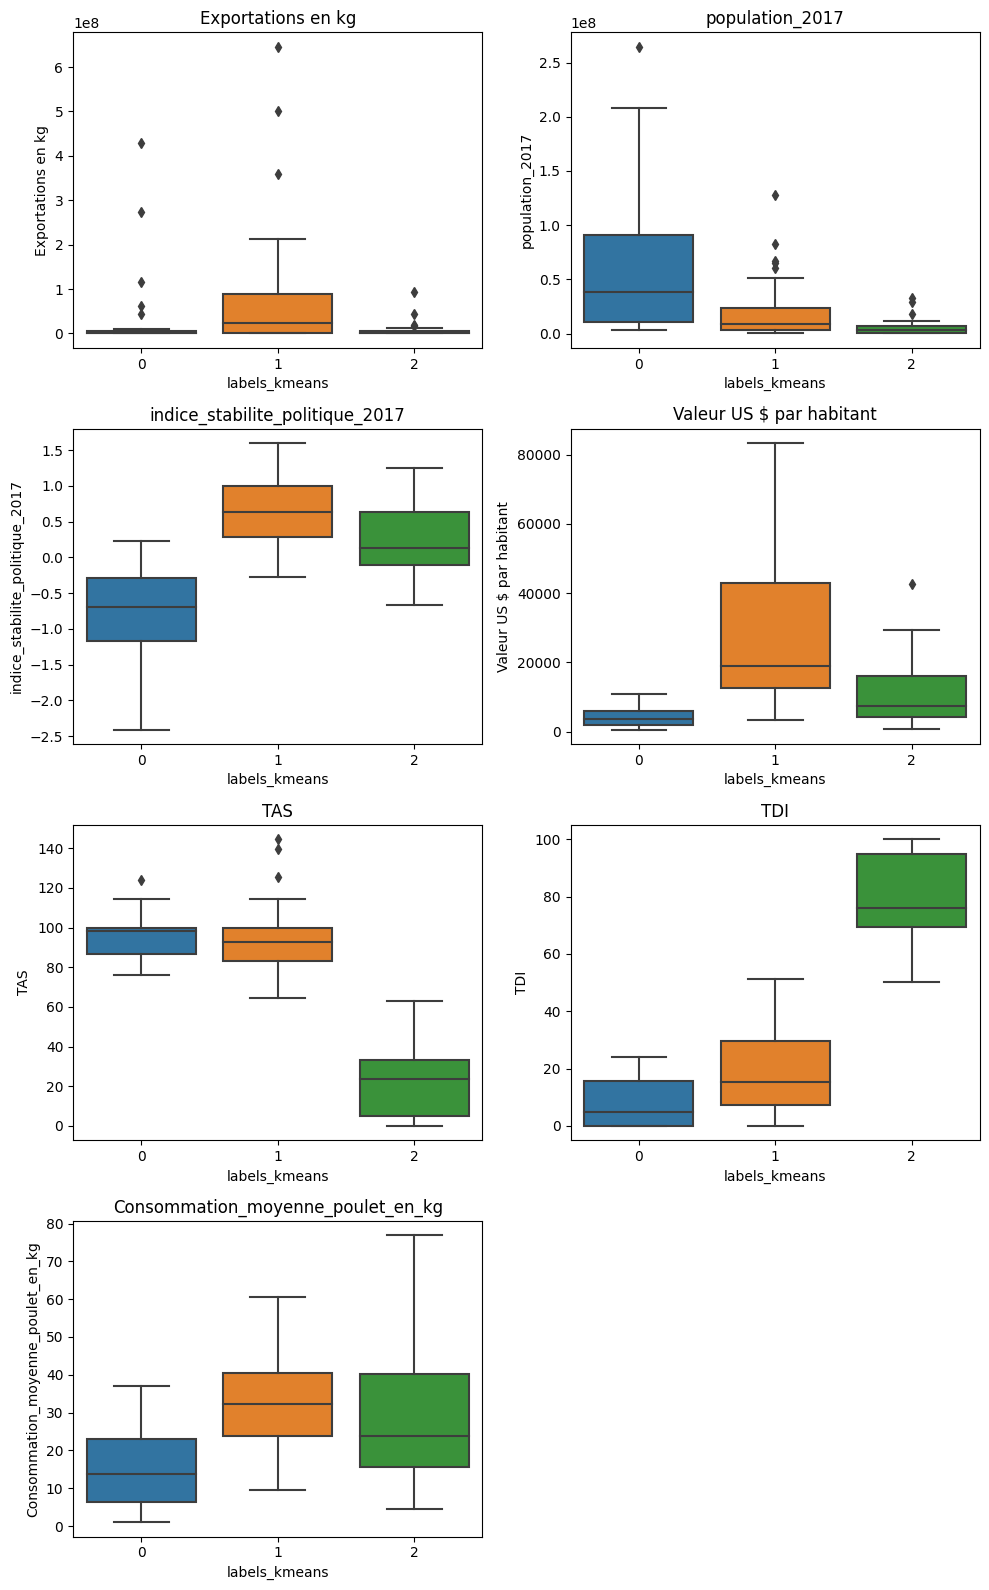

In [32]:
# Sélection des colonnes numériques à utiliser
num_cols = len(df_numeric.columns)
numeric_columns = df_numeric.columns.tolist()

# Supprimer 'groupe' et 'labels_kmeans' des colonnes numériques
numeric_columns = [col for col in numeric_columns if col not in ['groupe', 'labels_kmeans']]

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

# Création des boxplots
plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='labels_kmeans', y=column, data=X_df)
    plt.title(column)

plt.tight_layout()
plt.show()


Table de contingence

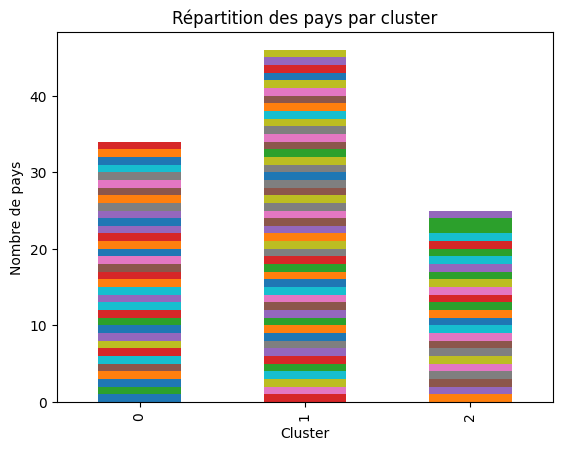

In [33]:
# Créer une table de contingence entre cluster_label et index des pays
contingency_table = pd.crosstab(X_df['labels_kmeans'], X_df.index)

# Tracer le barplot
ax = contingency_table.plot(kind='bar', stacked=True)

# Supprimer la légende
ax.legend_.remove()

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de pays')
plt.title('Répartition des pays par cluster')

# Afficher le graphique
plt.show()


Liste des pays par cluster

In [34]:
# Créer un dictionnaire pour stocker les pays de chaque cluster
pays_par_cluster = {}

# Regrouper les noms des pays pour chaque cluster
for groupe, data in X_df.groupby('labels_kmeans'):
    pays_par_cluster[groupe] = data.index.tolist()

# Afficher la liste des pays pour chaque cluster
for groupe, pays in pays_par_cluster.items():
    print(f"Cluster {groupe} : {pays}")


Cluster 0 : ['Afrique du Sud', 'Algérie', 'Azerbaïdjan', 'Bangladesh', 'Bosnie-Herzégovine', 'Cameroun', 'Colombie', 'El Salvador', 'Fédération de Russie', 'Honduras', 'Indonésie', "Iran (République islamique d')", 'Jordanie', 'Liban', 'Maroc', 'Mexique', 'Myanmar', 'Niger', 'Nigéria', 'Ouganda', 'Pakistan', 'Paraguay', 'Philippines', 'République de Moldova', 'Serbie', 'Sri Lanka', 'Sénégal', 'Tunisie', 'Turquie', 'Ukraine', 'Viet Nam', 'Zambie', 'Égypte', 'Équateur']
Cluster 1 : ['Allemagne', 'Argentine', 'Australie', 'Autriche', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Bélarus', 'Canada', 'Chili', 'Chypre', 'Costa Rica', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Fidji', 'Finlande', 'France', 'Grèce', 'Guyana', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Jamaïque', 'Japon', 'Lituanie', 'Malaisie', 'Maurice', 'Norvège', 'Nouvelle-Zélande', 'Panama', 'Portugal', 'Pérou', 'Roumanie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République de Corée', 'Républ

Visualisation des Clusters

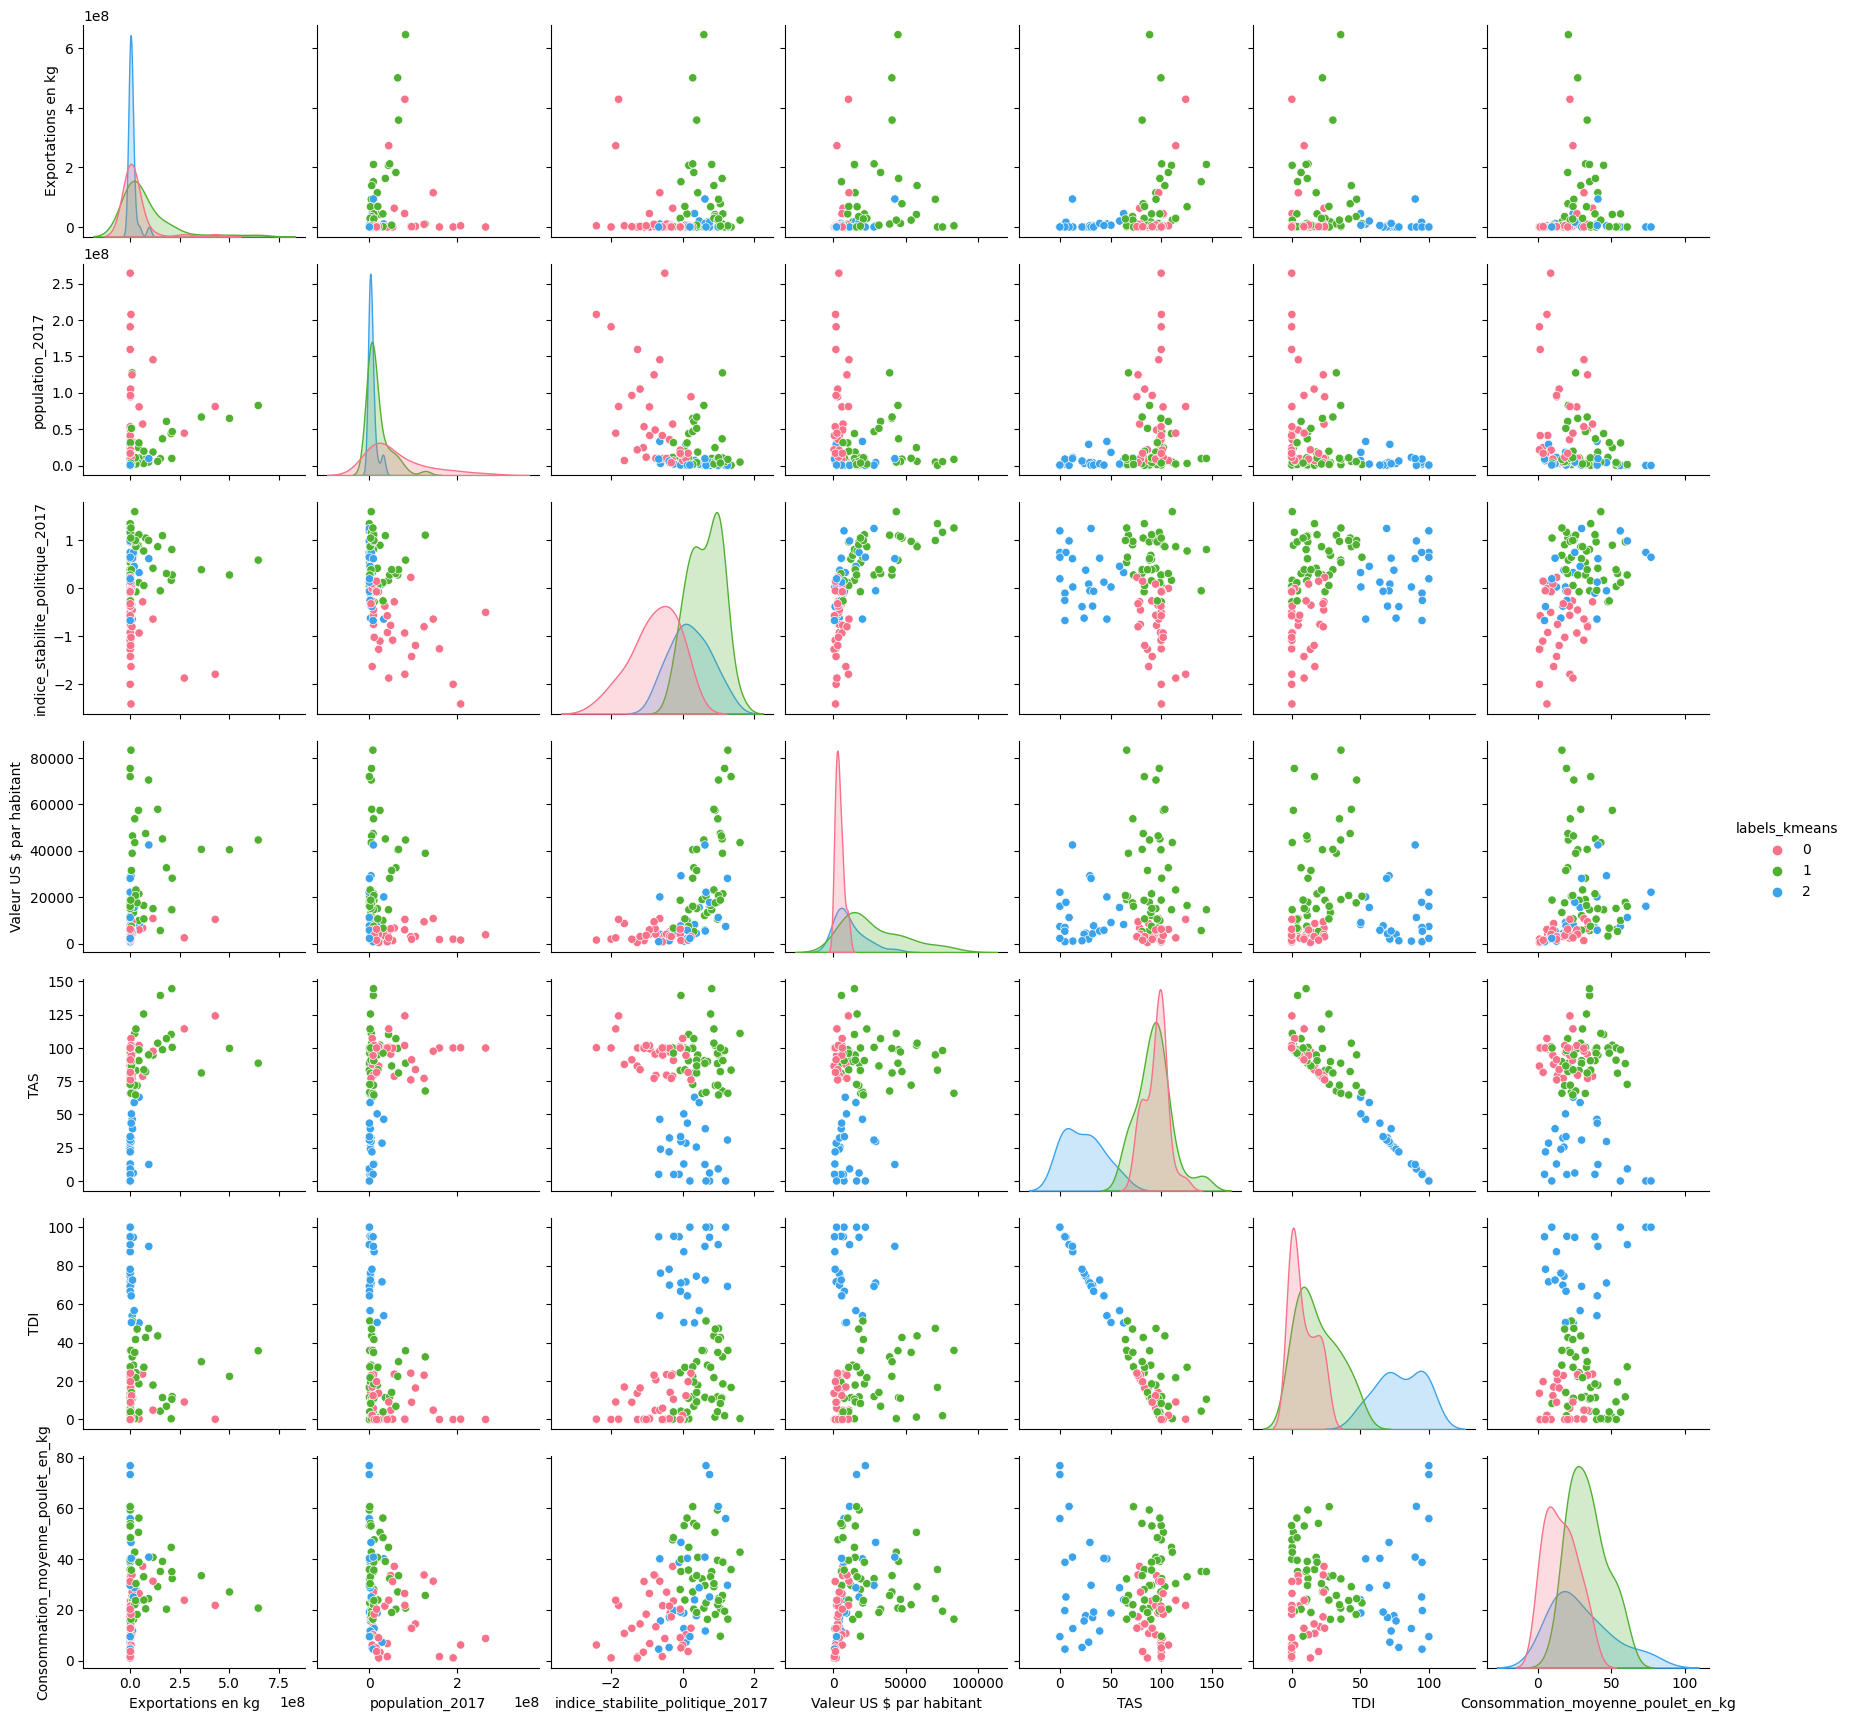

In [35]:
# Définir une palette de couleurs personnalisée
custom_palette = sns.color_palette("husl", n_colors=len(X_df['labels_kmeans'].unique()))

# Tracer le pairplot avec la palette personnalisée
sns.pairplot(X_df, hue="labels_kmeans", palette=custom_palette)

# Afficher le pairplot
plt.show()

<font color='deepskyblue'>****** Nous allons faire notre projection en utilisant une ACP. *******</font>

*****************

3° Réaliser une (ACP) Analyse en Composantes Principales pour projeter les données sur 2 dimensions

suppression colonne "labels_kmeans"

In [36]:
X_df = X_df.drop(columns='labels_kmeans')

On instancie notre objet et on entraine notre PCA :

In [37]:
pca = PCA(n_components=4)
df_pca = pca.fit(X_norm)
df_pca

PCA(n_components=4)

Calcule de la variance expliquée cumulée :

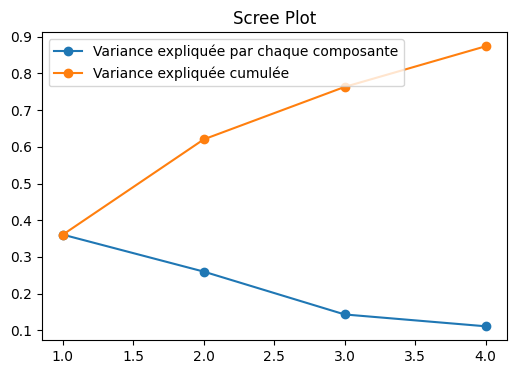

In [38]:
# Calculer la variance expliquée + variance expliquée cumulée
explained_variance = df_pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot (éboulis) avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
#plt.xlabel('nb PC')
#plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()

In [39]:
scree = (df_pca.explained_variance_ratio_ * 100).round(2)
scree_cum = (df_pca.explained_variance_ratio_.cumsum() * 100).round(2)

print(f'Variance expliquée : {scree}')
print(f'Variance expliquée cumulée :{scree_cum}')

Variance expliquée : [36.06 25.98 14.3  11.08]
Variance expliquée cumulée :[36.06 62.04 76.34 87.42]


=> la 1ère composante capte 36% de la variance de nos données initiales

=> 62% de la variance des données est expliquée par les 2 premières composantes et 87% de la variance par les 4 premières composantes.

In [41]:
# nous mettons nos 4 composantes principales
n_components = 4
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

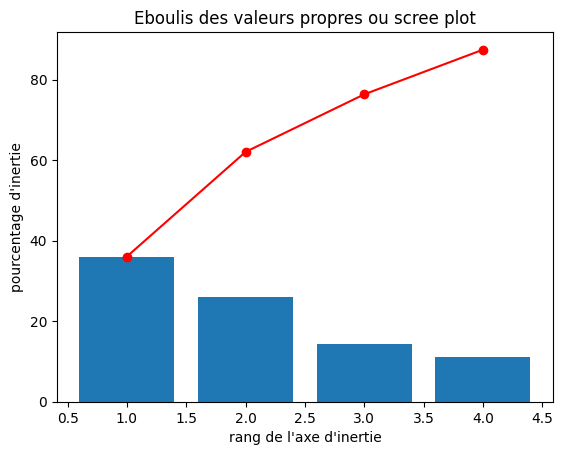

In [42]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l\'axe d\'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres ou scree plot")
plt.show(block=False)

Obtenir nos 4 composantes principales avec l'attribut "components_"

In [44]:
pcs = df_pca.components_
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6
0  0.120750  0.426417 -0.445277 -0.216122  0.465460 -0.500696 -0.302091
1  0.402112 -0.059556  0.405438  0.555856  0.426190 -0.323441  0.274137
2  0.664592  0.441640 -0.123787  0.227143 -0.303600  0.396720 -0.216322
3 -0.278415 -0.101887  0.236236  0.402467  0.026118 -0.010997 -0.832775

In [45]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Exportations en kg  population_2017  indice_stabilite_politique_2017   
F1                0.12             0.43                            -0.45  \
F2                0.40            -0.06                             0.41   
F3                0.66             0.44                            -0.12   
F4               -0.28            -0.10                             0.24   

    Valeur US $ par habitant   TAS   TDI  Consommation_moyenne_poulet_en_kg  
F1                     -0.22  0.47 -0.50                              -0.30  
F2                      0.56  0.43 -0.32                               0.27  
F3                      0.23 -0.30  0.40                              -0.22  
F4                      0.40  0.03 -0.01                              -0.83

In [46]:
pcs.T

F1        F2        F3        F4
Exportations en kg                 0.120750  0.402112  0.664592 -0.278415
population_2017                    0.426417 -0.059556  0.441640 -0.101887
indice_stabilite_politique_2017   -0.445277  0.405438 -0.123787  0.236236
Valeur US $ par habitant          -0.216122  0.555856  0.227143  0.402467
TAS                                0.465460  0.426190 -0.303600  0.026118
TDI                               -0.500696 -0.323441  0.396720 -0.010997
Consommation_moyenne_poulet_en_kg -0.302091  0.274137 -0.216322 -0.832775

<Axes: >

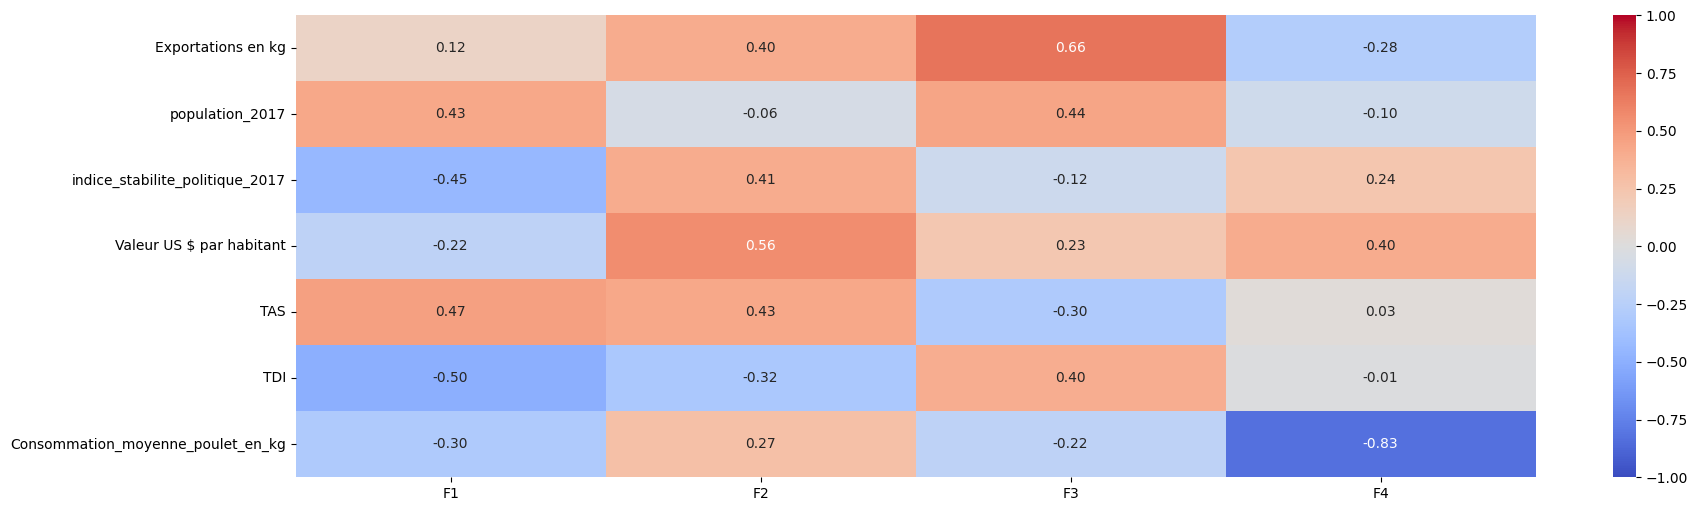

In [47]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

<font color='lightgreen'>

- 1° Corrélation inversée : 
    - entre TAS et TDI (les pays qui dépendent bcp des importations, ont un TAS négatif et inversement)
    - entre TDI et exportations (moins un pays exporte, plus il dépendra des importations)
    - population et consommation de viande (moins la population est dense, plus il y a consommation de viande)

- 2° Corrélation positive entre : Exportations, stabilité politique, PIB/habitant, TAS et consommation de viande de volaille :
    - stabilité politique, PIB/hab. et TAS et exportations (plus un pays a un fort PIB plus il sera autosuffisant et donc exportera plus)
    - stabilité politique et TDI
    - stabilité politique et consommation de volaille
    - exportations et TAS
    
</font>

### Cercle des corrélations

In [48]:
def correlation_graph(df_pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, df_pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                df_pca.components_[x, i],  
                df_pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(df_pca.components_[x, i] + 0.05,
                df_pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*df_pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*df_pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [49]:
x_y = (0,1)
x_y

(0, 1)

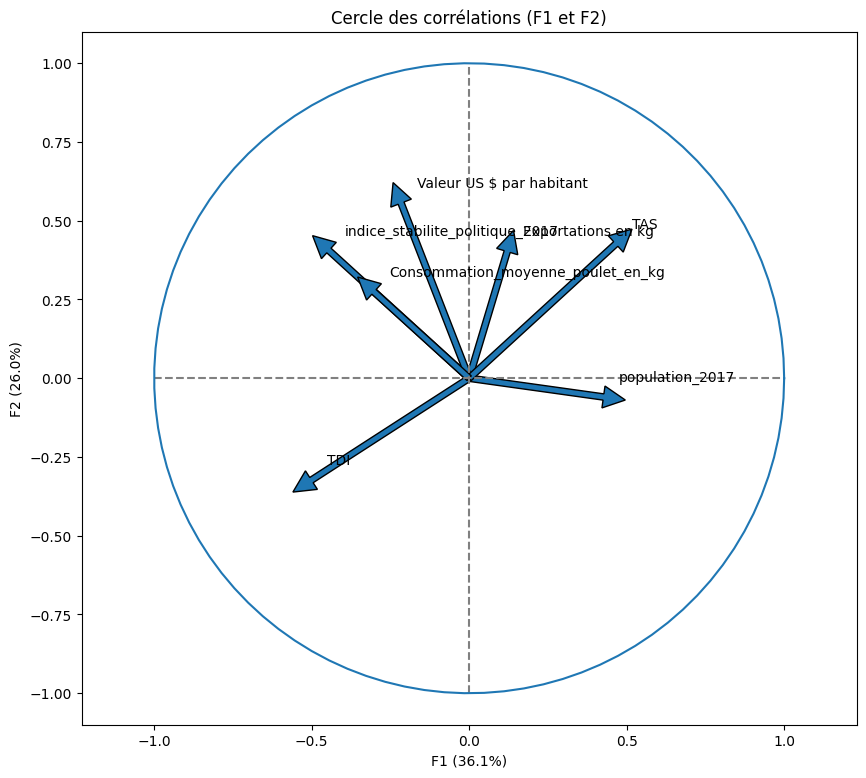

In [50]:
correlation_graph(df_pca, x_y, features)

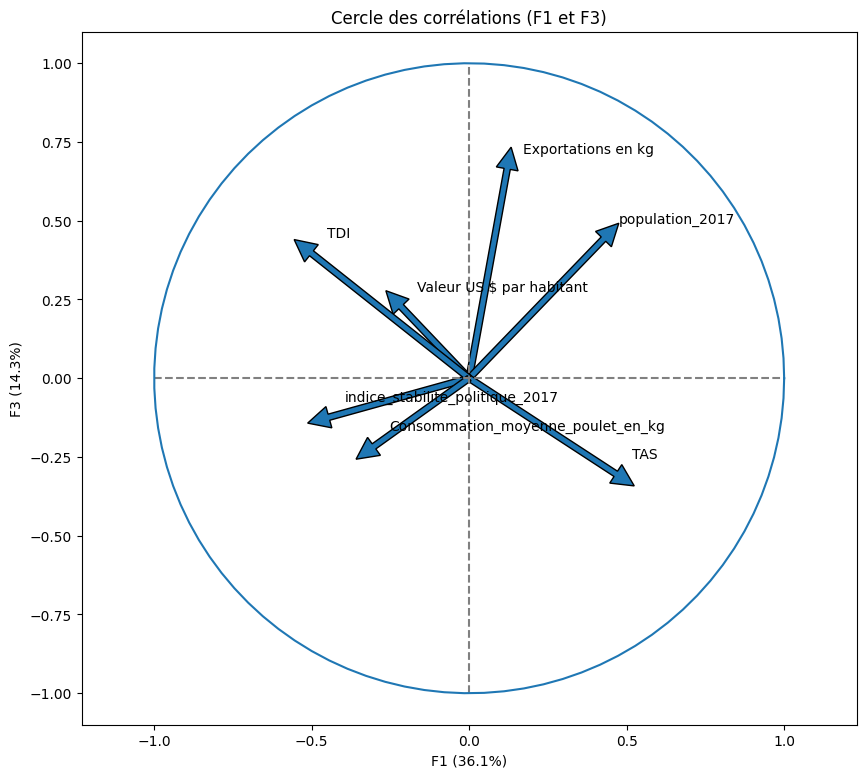

In [55]:
correlation_graph(df_pca, (0,2), features)

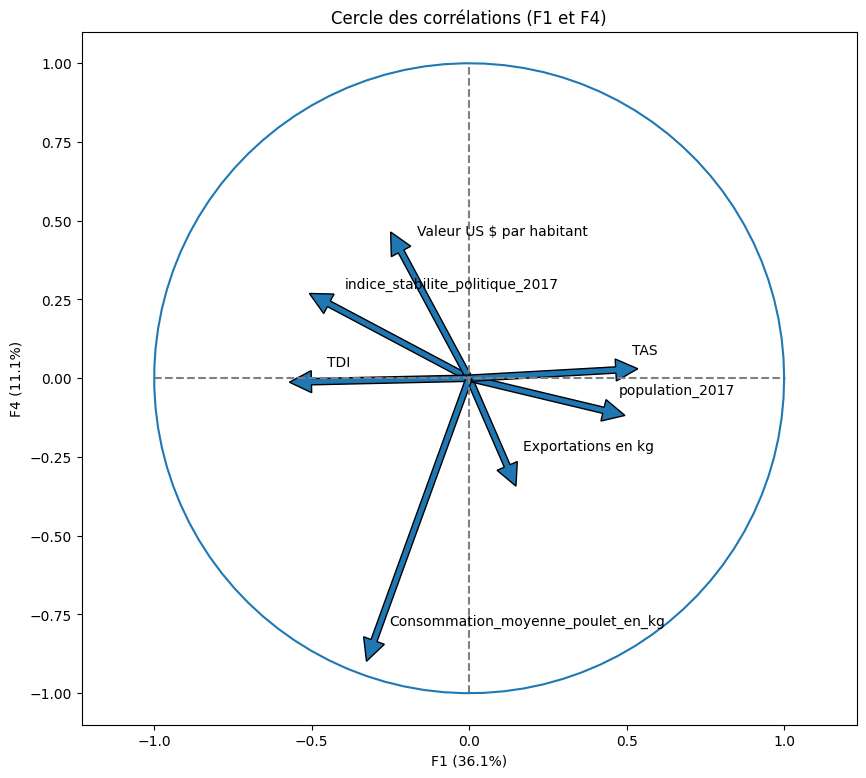

In [56]:
correlation_graph(df_pca, (0,3), features)

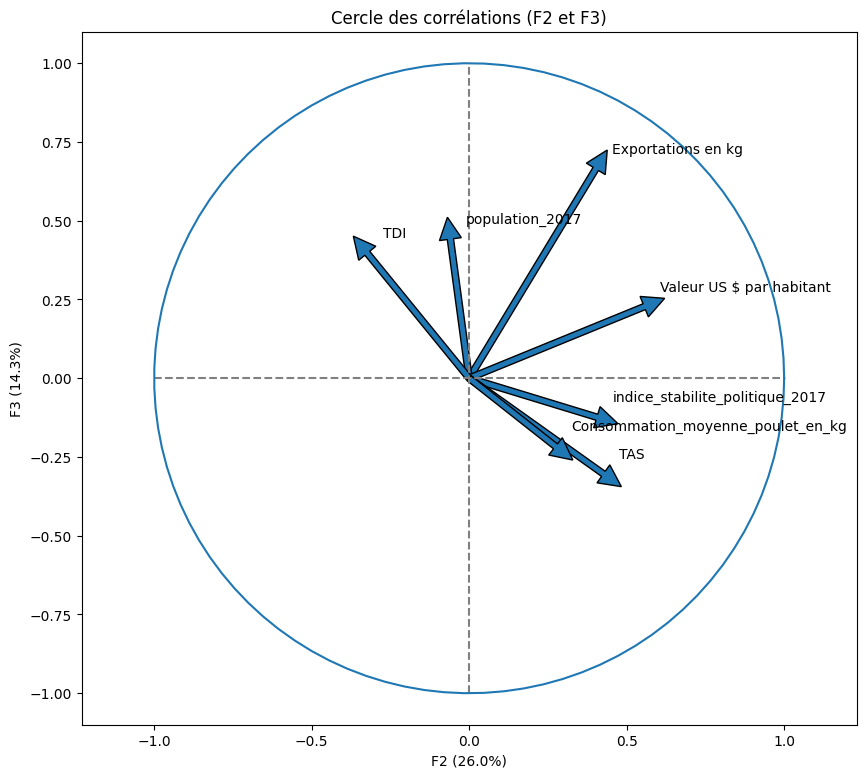

In [57]:
correlation_graph(df_pca, (1,2), features)

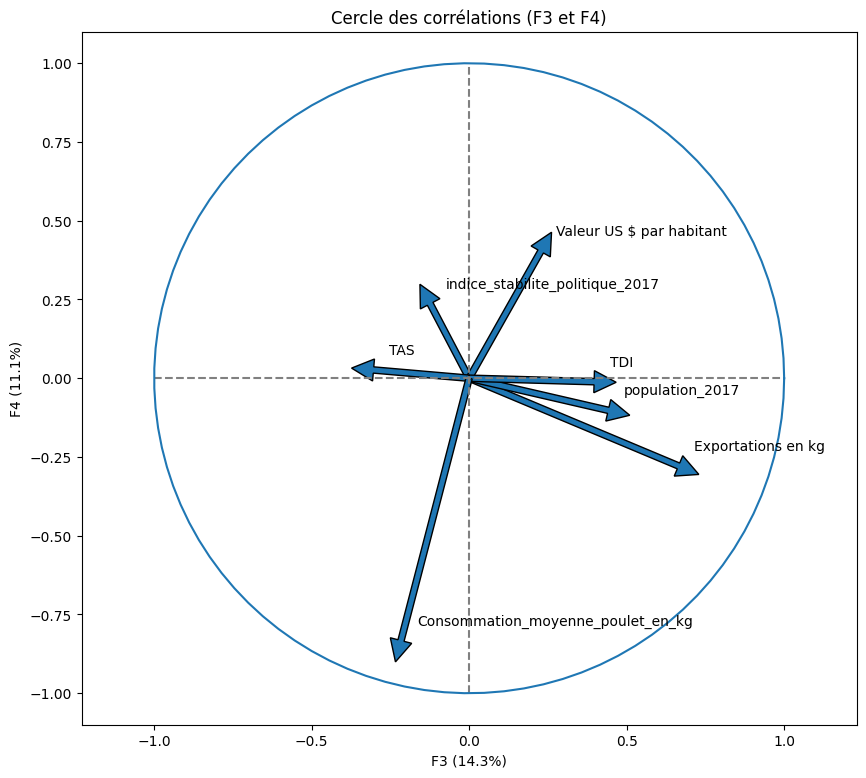

In [58]:
correlation_graph(df_pca, (2,3), features)

******

### PROJECTION DES INDIVIDUS (ici il s'agit de nos pays) 

- sur les premiers et seconds plans factoriels

In [59]:
X_proj = df_pca.transform(X_norm)
X_proj[:5]

array([[ 0.50849383, -0.16982613,  0.07262612, -0.94293087],
       [-1.57937945, -1.61008698,  0.42440703,  0.42251636],
       [ 1.89100662, -0.80528427, -0.47962827,  0.60032093],
       [ 0.73438822,  3.33824908,  4.63652953, -0.61458482],
       [-3.73902259, -0.7180513 ,  0.29928134, -2.09001649]])

In [60]:
def display_factorial_planes(   X_proj, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_proj)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if df_pca : 
        v1 = str(round(100*df_pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*df_pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

In [61]:
X_df['labels_kmeans']=labels # rajout colonne labels
X_df.head(2)

Exportations en kg  population_2017   
Zone                                                  
Afrique du Sud          63000000.0       57009756.0  \
Albanie                        0.0        2884169.0   

                indice_stabilite_politique_2017  Valeur US $ par habitant   
Zone                                                                        
Afrique du Sud                            -0.28               6723.928582  \
Albanie                                    0.38               4521.752217   

                      TAS        TDI  Consommation_moyenne_poulet_en_kg   
Zone                                                                      
Afrique du Sud  78.706327  23.567171                          37.151536  \
Albanie         25.490196  74.509804                          17.682736   

                labels_kmeans  
Zone                           
Afrique du Sud              0  
Albanie                     2

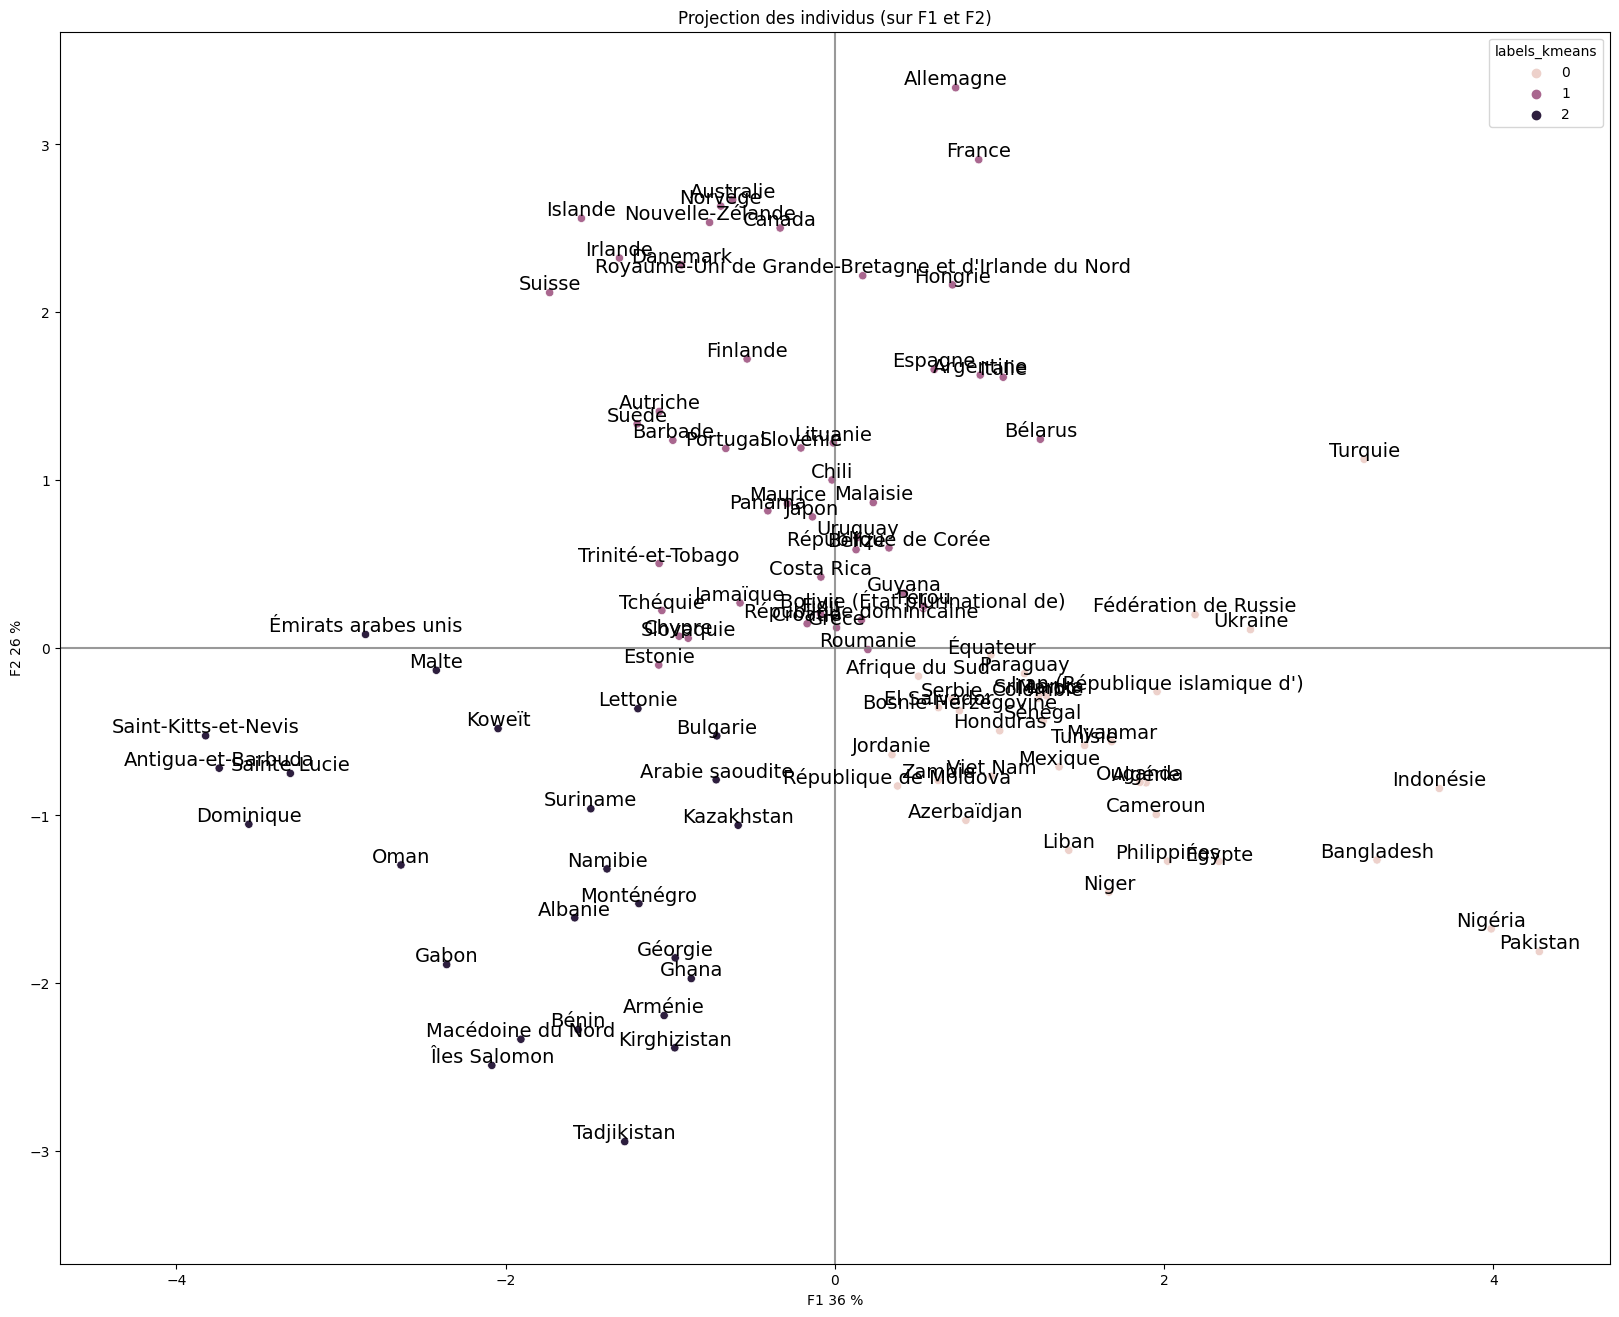

In [64]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, df_pca, labels=pays, figsize=(20,16), clusters=X_df['labels_kmeans'], marker="o")

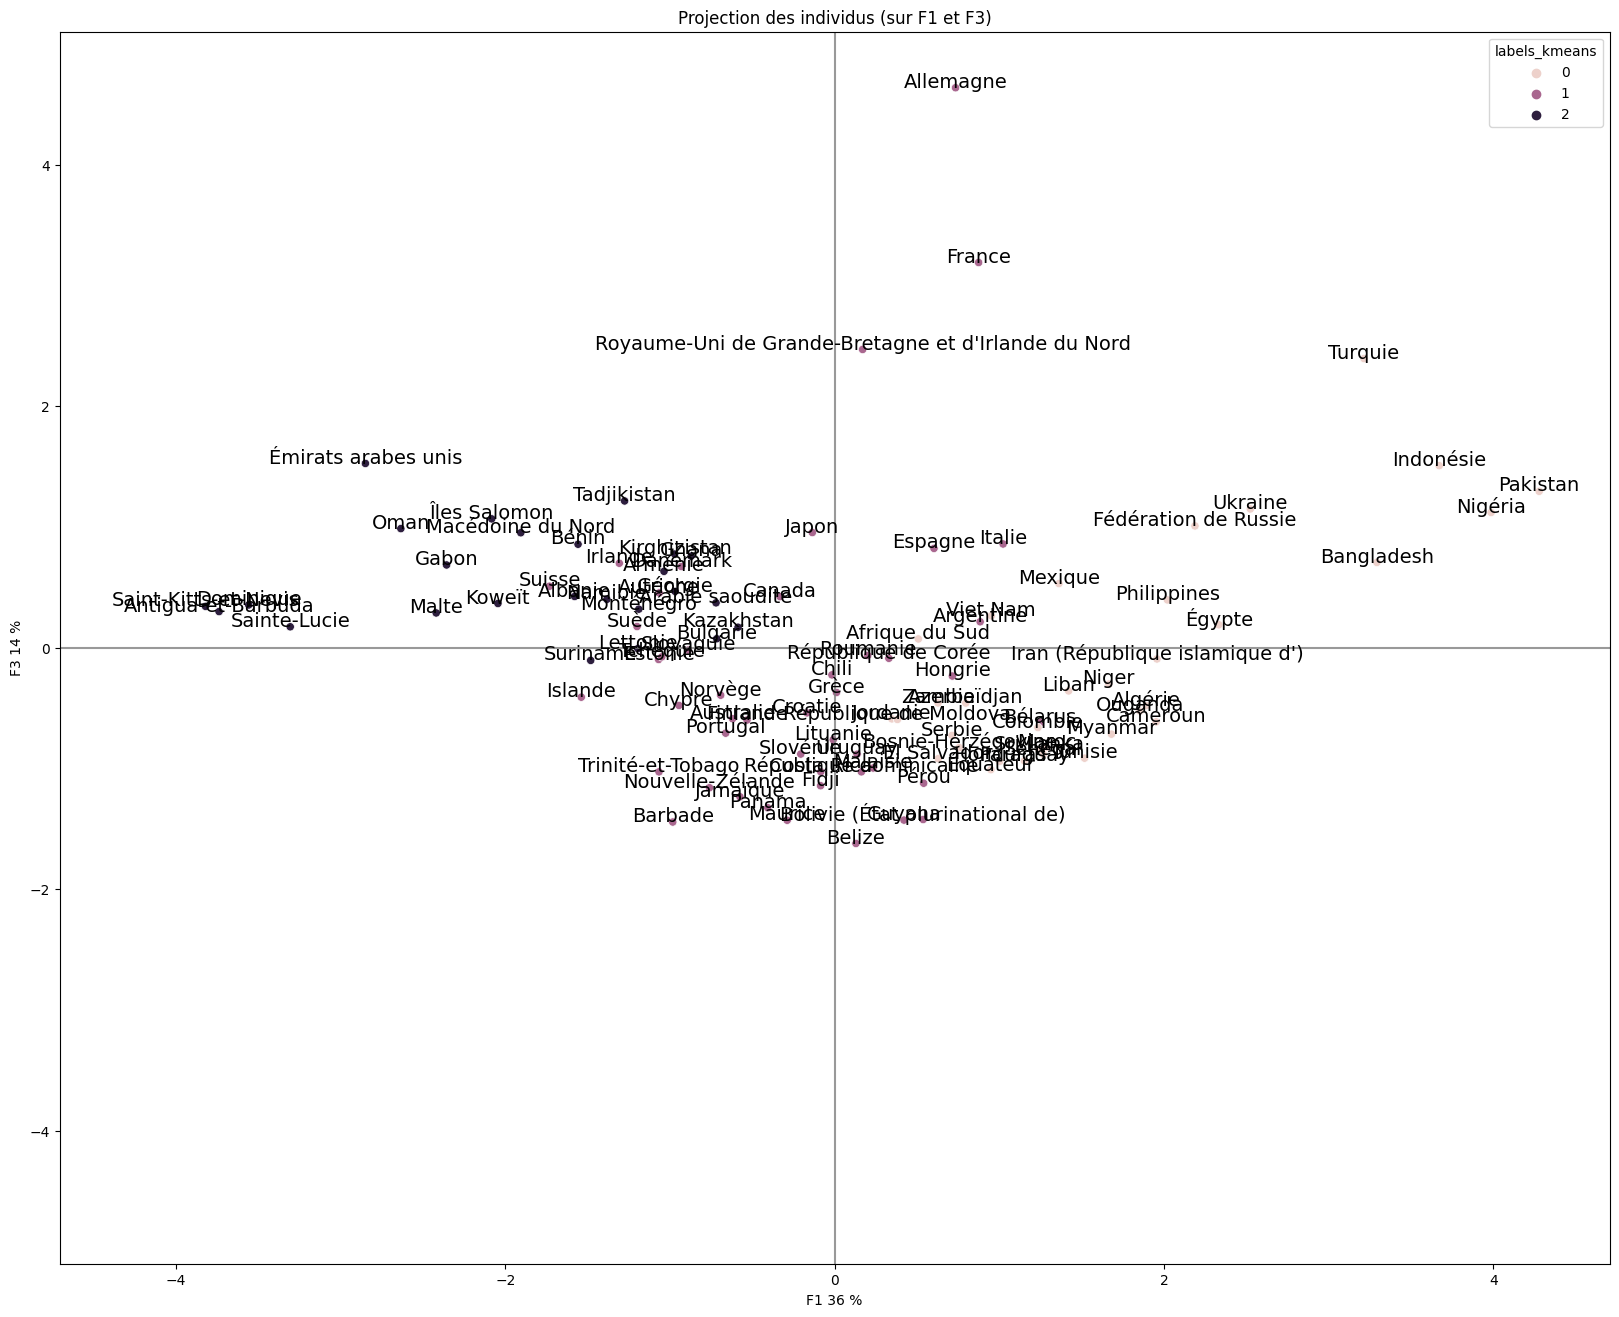

In [65]:
x_y = [0,2]
display_factorial_planes(X_proj, x_y, df_pca, labels=pays, figsize=(20,16), clusters=X_df['labels_kmeans'], marker="o")

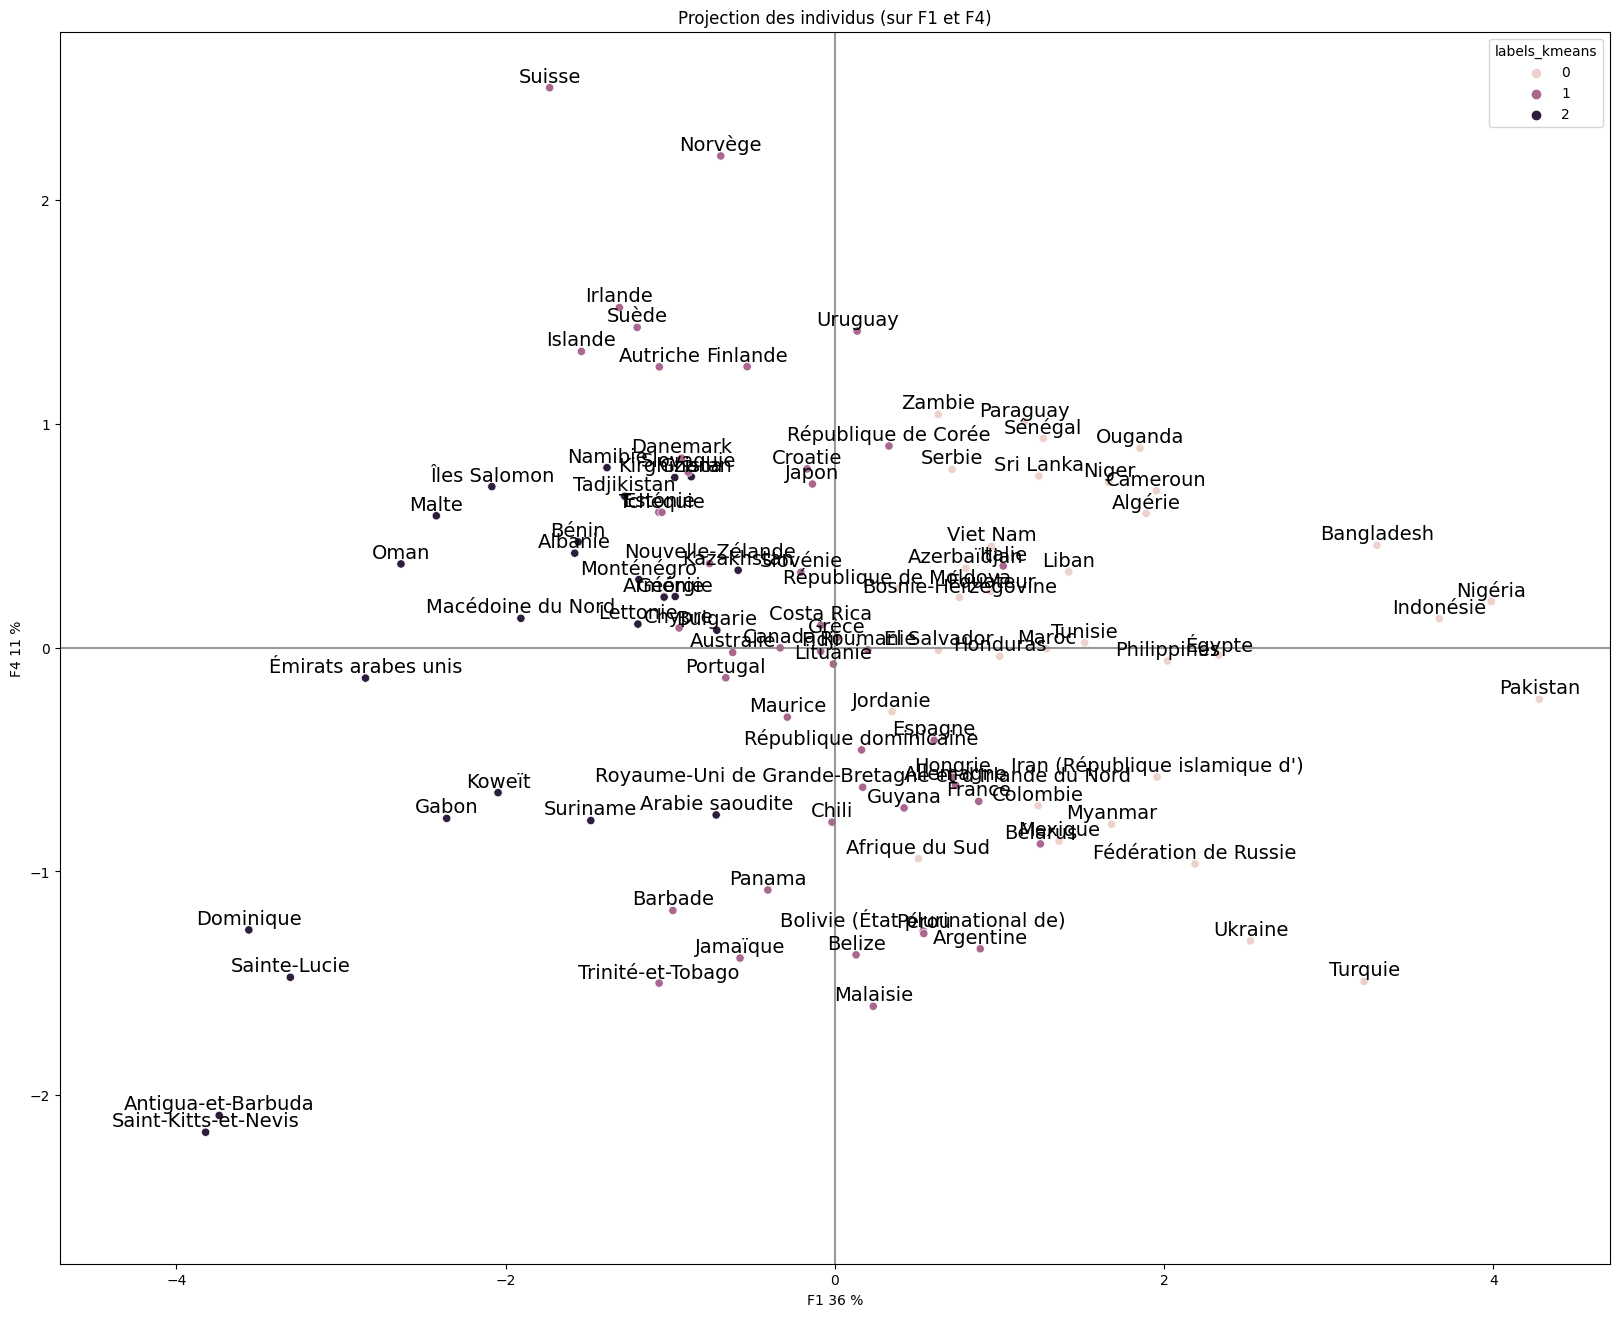

In [66]:
x_y = [0,3]
display_factorial_planes(X_proj, x_y, df_pca, labels=pays, figsize=(20,16), clusters=X_df['labels_kmeans'], marker="o")

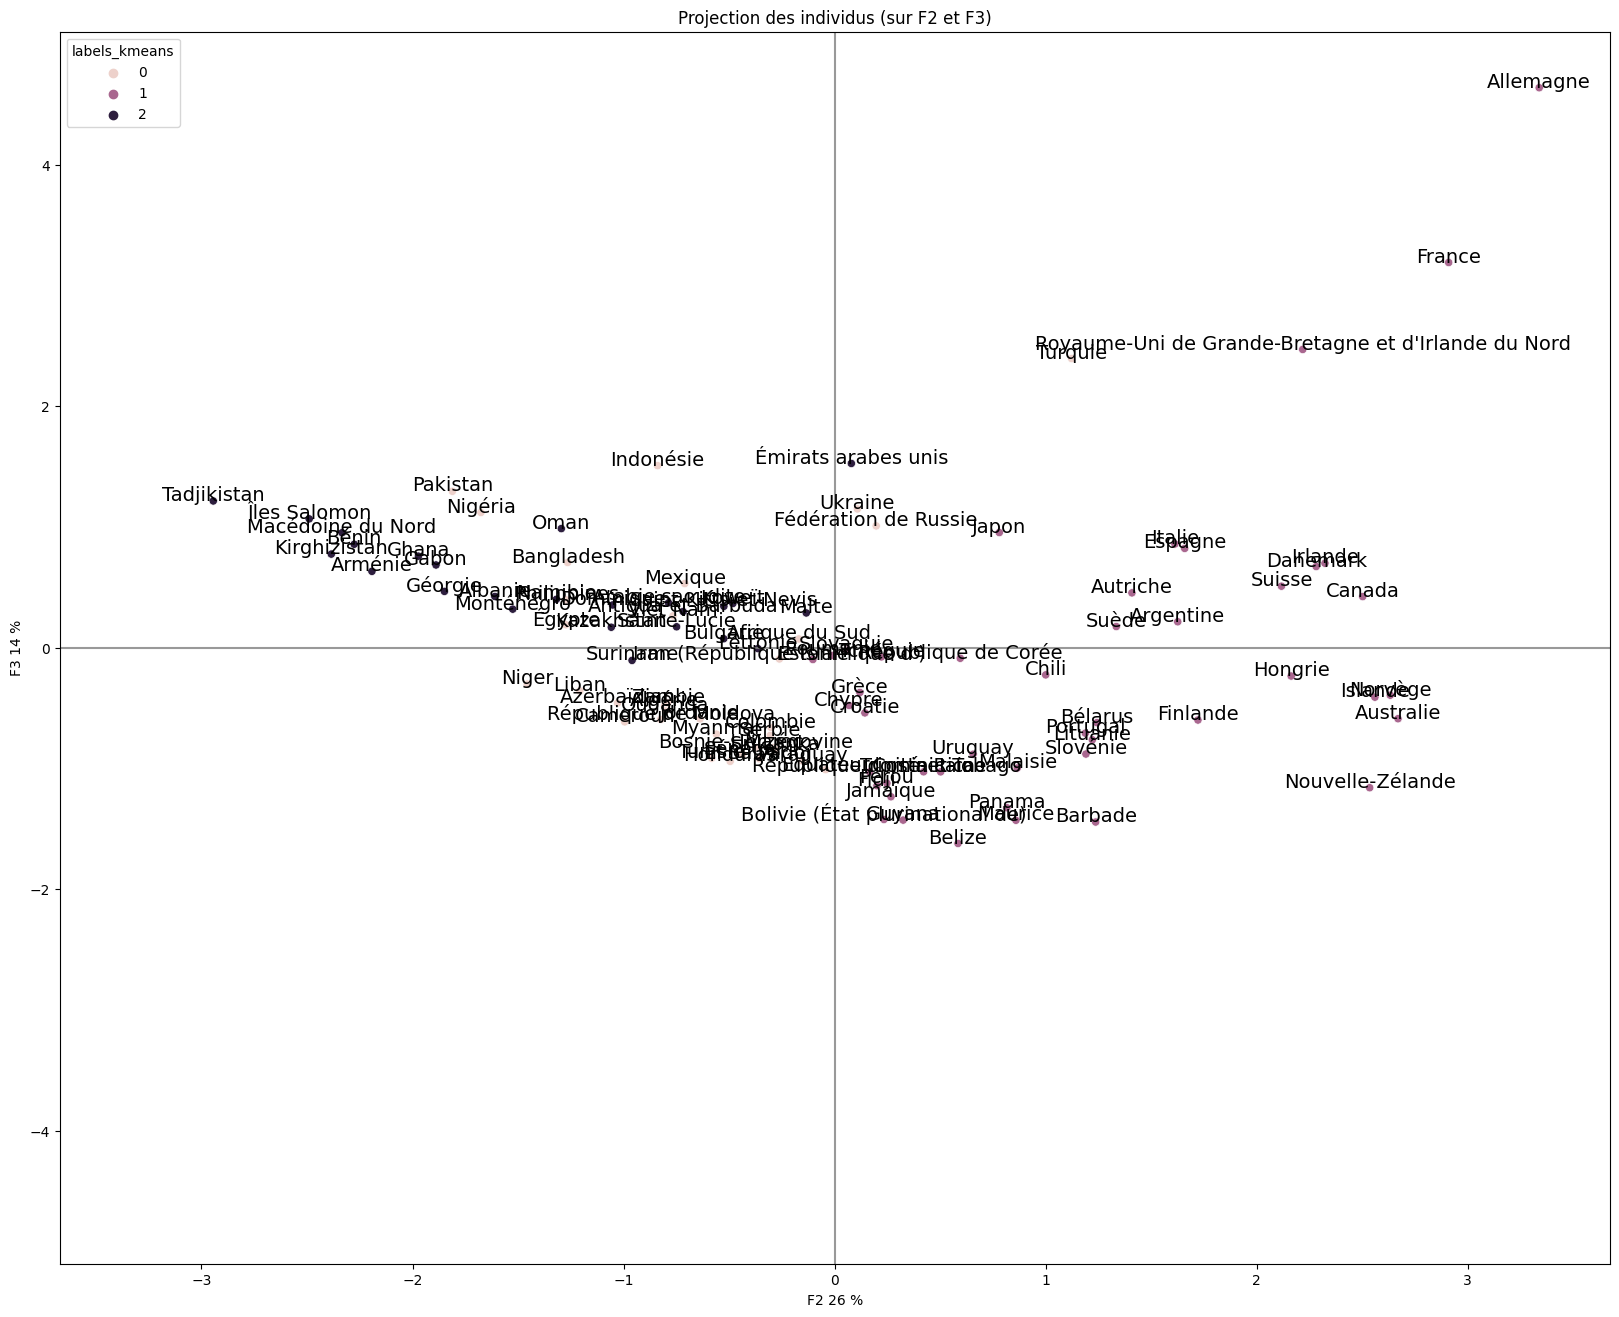

In [67]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y, df_pca, labels=pays, figsize=(20,16), clusters=X_df['labels_kmeans'], marker="o")

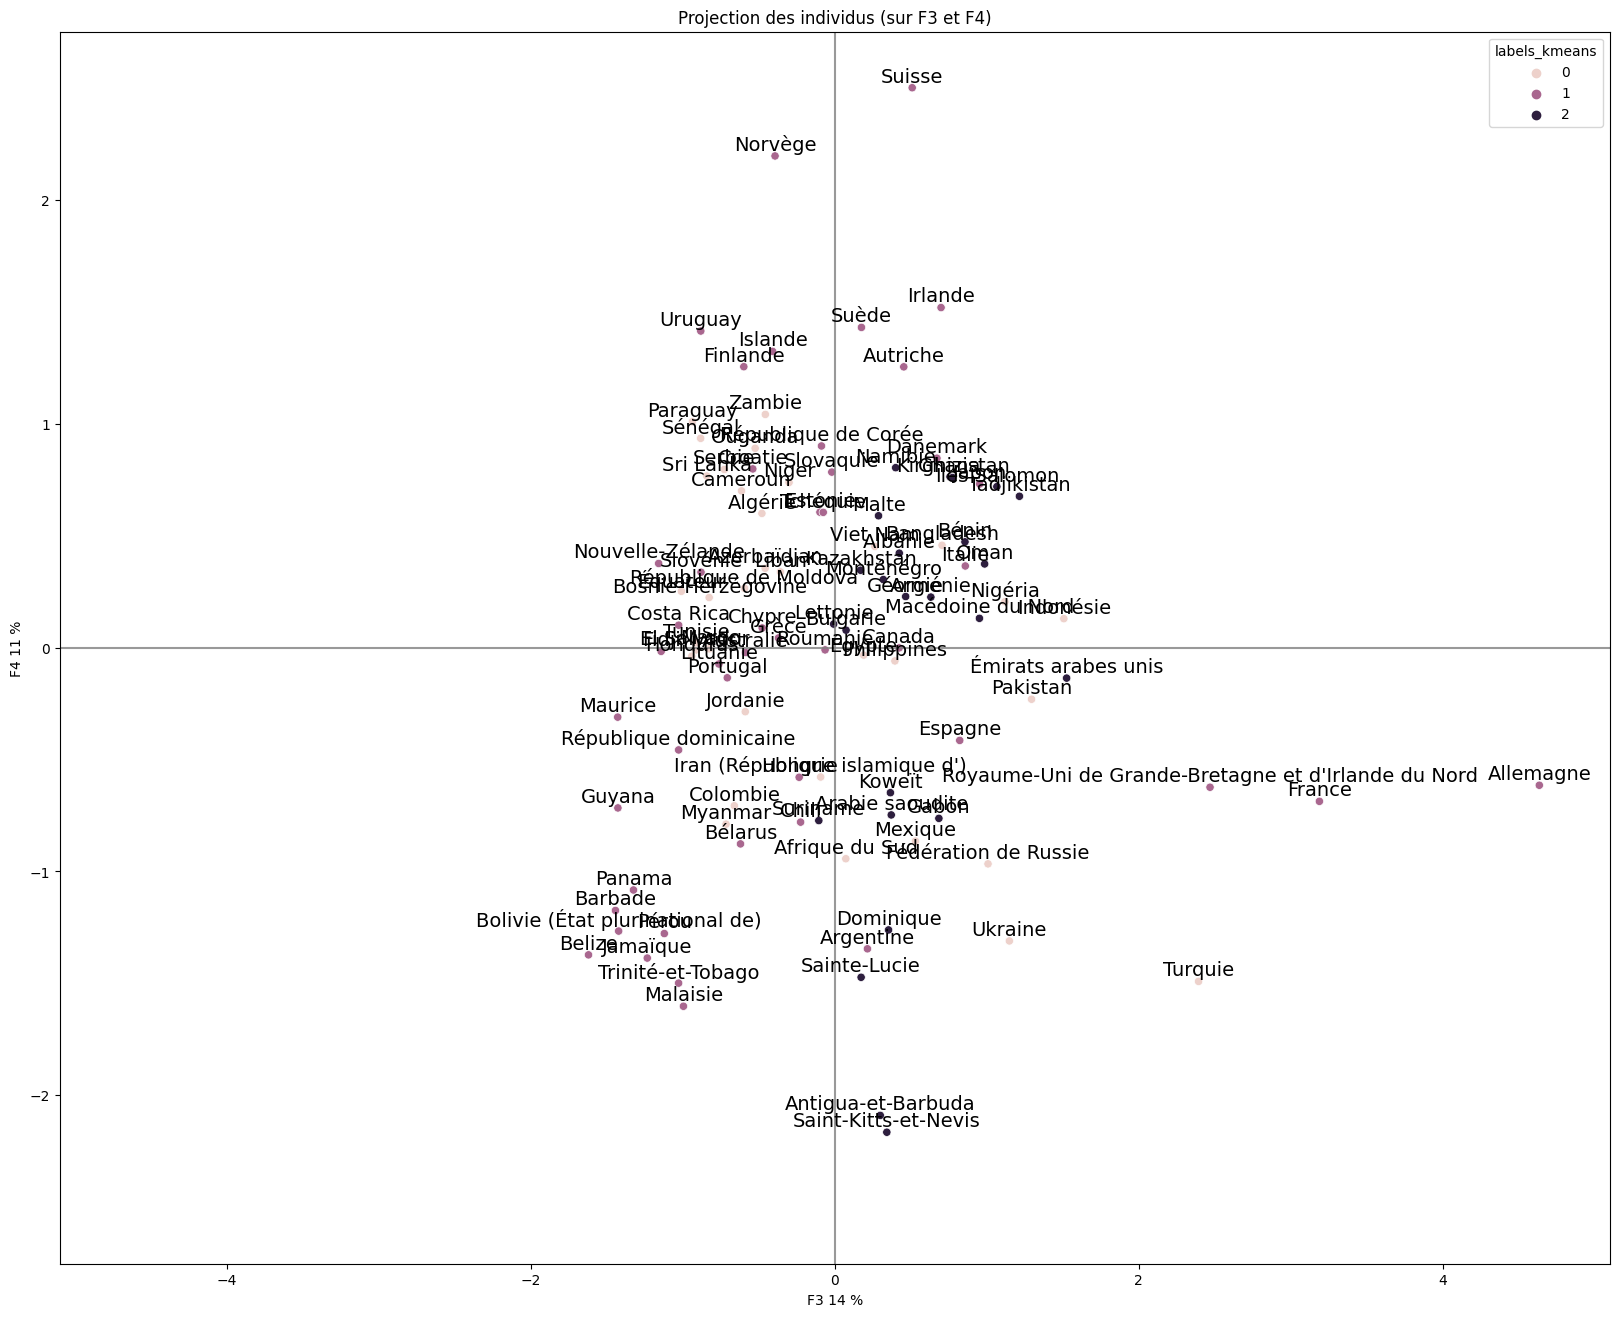

In [68]:
x_y = [2, 3]
display_factorial_planes(X_proj, x_y, df_pca, labels=pays, figsize=(20,16), clusters=X_df['labels_kmeans'], marker="o")

************************* END ACP ****************************

In [69]:
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", "F3", "F4"])
X_proj[:10]

F1        F2        F3        F4
0  0.508494 -0.169826  0.072626 -0.942931
1 -1.579379 -1.610087  0.424407  0.422516
2  1.891007 -0.805284 -0.479628  0.600321
3  0.734388  3.338249  4.636530 -0.614585
4 -3.739023 -0.718051  0.299281 -2.090016
5 -0.720500 -0.787241  0.371614 -0.747245
6  0.883665  1.625583  0.214905 -1.345488
7 -1.036448 -2.192454  0.632393  0.226278
8 -0.620035  2.669312 -0.587807 -0.021349
9 -1.065683  1.408517  0.454090  1.255187

Scaler et Calculer nos centroïdes

In [70]:
centroids_scaled = scaler.fit_transform(centroids)
centroids_scaled

array([[-0.32497665,  1.3784184 , -1.35596547, -1.02953806,  0.7317739 ,
        -0.87513517, -1.38226707],
       [ 1.35445839, -0.41539899,  1.02585949,  1.35443476,  0.68214942,
        -0.52451548,  0.94998352],
       [-1.02948174, -0.96301941,  0.33010598, -0.3248967 , -1.41392331,
         1.39965065,  0.43228354]])

Création d'un dataframe

In [71]:
centroids_proj = df_pca.transform(centroids_scaled)
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", 'F4'], 
                              index=["cluster_0", "cluster_1", "cluster_2"])
centroids_proj

F1        F2        F3        F4
cluster_0  2.571184 -1.118806  0.056450  0.395207
cluster_1 -0.469943  2.458977  0.276679 -0.314856
cluster_2 -2.101241 -1.340171 -0.333129 -0.080351

### Visualisation de nos clusters avec centroïdes

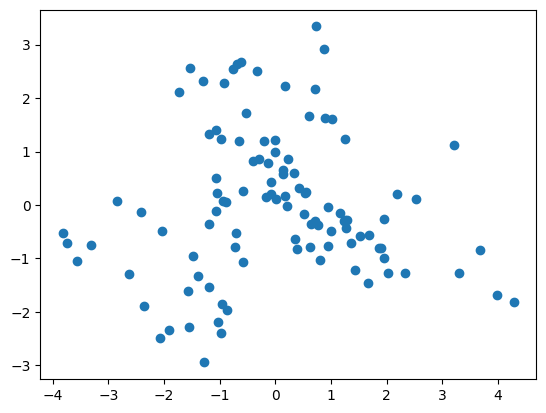

In [72]:
plt.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1])

Text(0, 0.5, 'F2 (26.0%)')

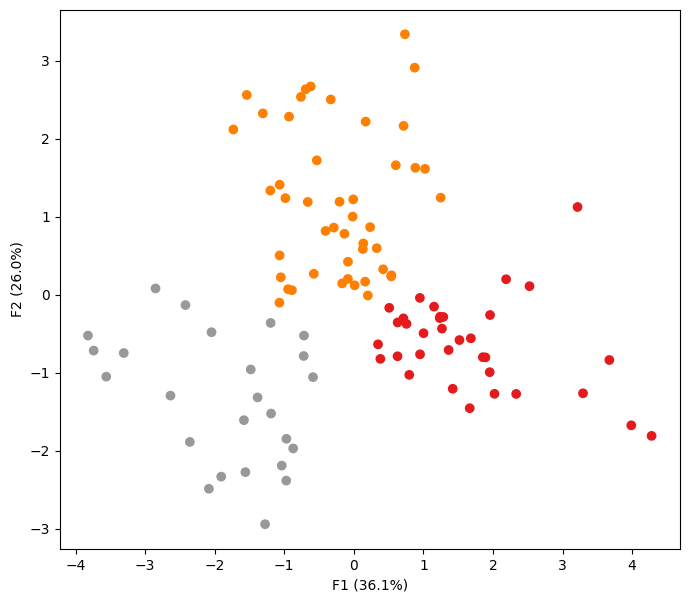

In [73]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

#Transforme notre DataFrame d'origine
X_ = np.array(X_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*df_pca.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*df_pca.explained_variance_ratio_[y],1)))

Text(0.5, 1.0, 'Projection des individus (sur F1 et F2)')

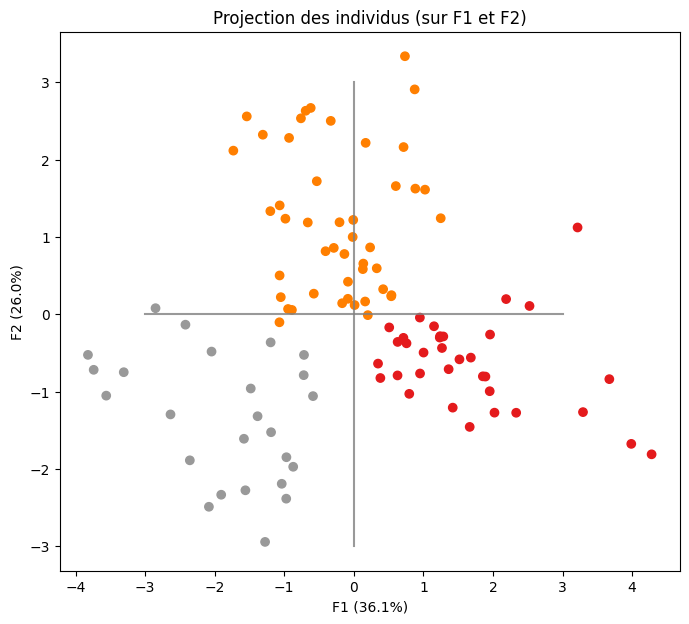

In [74]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

#Transforme notre DataFrame d'origine
X_ = np.array(X_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*df_pca.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*df_pca.explained_variance_ratio_[y],1)))

# affichage des lignes horizontales et verticales
plt.plot([-3, 3], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-3, 3], color='grey', alpha=0.8)

# on rajoute un tritre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )

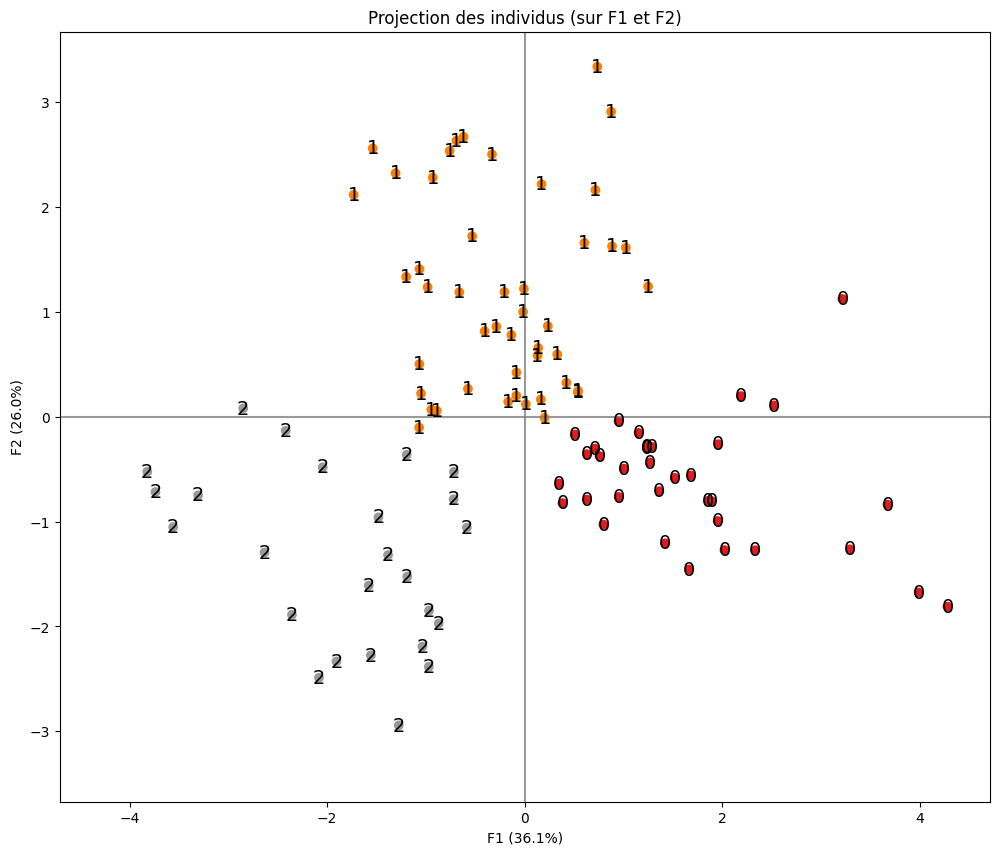

In [75]:
fig, ax = plt.subplots(1,1, figsize=(12,10))

#Transforme notre DataFrame d'origine
X_ = np.array(X_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*df_pca.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*df_pca.explained_variance_ratio_[y],1)))

# valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1

# affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

# on borne x et y 
ax.set_xlim(left= -x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)

# un tritre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )

# affichage des labels des points
for i,(x,y) in enumerate(X_[:,[x,y]]):
    ax.text(x, y, labels[i], fontsize='14', ha='center',va='center') 

plt.show()

Text(0, 0.5, 'F2')

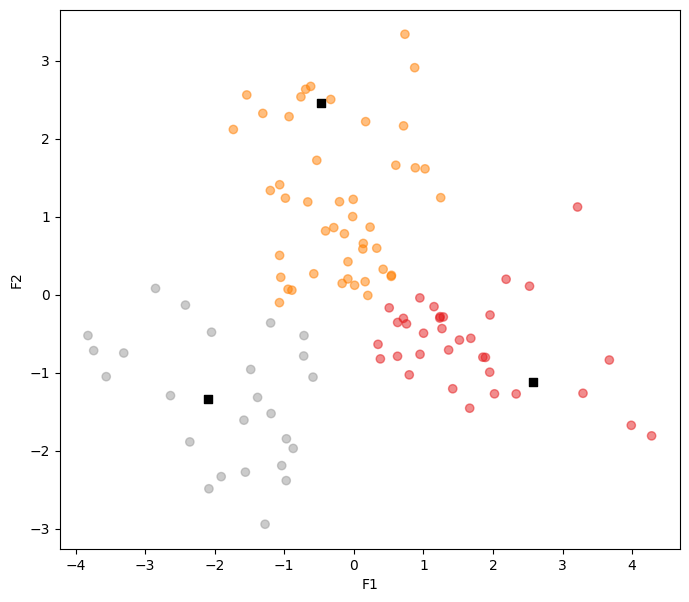

In [76]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c=labels, cmap="Set1", alpha=0.5)
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

ax.set_xlabel("F1")
ax.set_ylabel("F2")

Visualisation en 3D

Text(0.5, 0, 'F3')

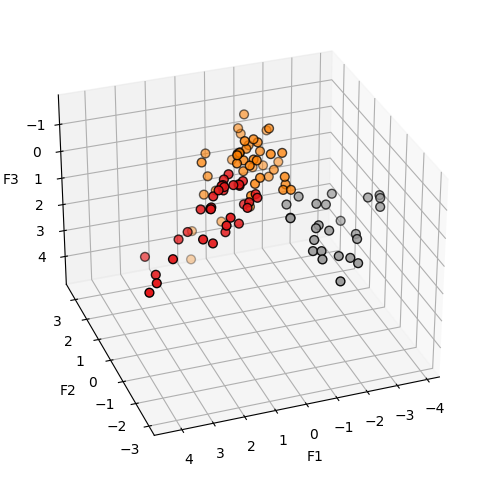

In [77]:
fig= plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40)

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")


In [78]:
import plotly.express as px

fig = px.scatter_3d(x=X_proj.iloc[:,0], y=X_proj.iloc[:,1], z=X_proj.iloc[:, 2],
              color=labels)
fig.show()

### T-SNE

=> Méthode non déterministe

In [79]:
from sklearn.manifold import TSNE

In [80]:
tsne = TSNE(n_components=2, learning_rate=30, init='random', perplexity=30, n_iter=300)
tsne

TSNE(init='random', learning_rate=30, n_iter=300, perplexity=30)

In [81]:
X_tsne = tsne.fit_transform(X_norm)    
X_tsne[:10]

array([[-1.7371012 ,  2.0169477 ],
       [ 5.6022067 ,  2.9769723 ],
       [-5.0237617 ,  3.5207257 ],
       [ 2.2636282 , -2.9834895 ],
       [ 8.255503  ,  0.56675905],
       [ 5.0697565 ,  1.1773386 ],
       [-0.5338821 , -3.9254155 ],
       [ 5.7003484 ,  4.016126  ],
       [ 1.8359911 , -6.2386327 ],
       [ 3.4642572 , -4.74591   ]], dtype=float32)

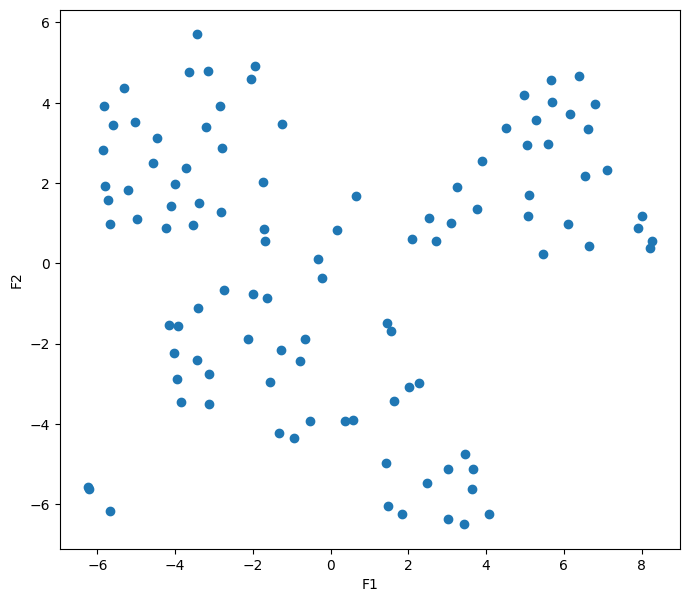

In [82]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1])
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [83]:
tsne = TSNE(n_components=3, learning_rate=30, init='random', perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_norm)    
X_tsne[:10]

array([[ 2.4949486 , -0.90684086,  3.3196628 ],
       [-4.384069  ,  0.87302285, -5.734795  ],
       [ 0.10055003,  2.4514523 ,  5.9073715 ],
       [ 6.4242826 ,  3.02461   , -1.2120129 ],
       [-1.9216272 , -2.7245297 , -8.804821  ],
       [-0.40474522,  0.34417984, -6.1474457 ],
       [ 3.5289905 ,  0.30355316,  1.0191454 ],
       [-2.7840757 ,  2.6704133 , -7.437247  ],
       [ 4.2565193 , -3.3132536 , -2.0837266 ],
       [ 2.2750754 , -0.73612326, -3.9878595 ]], dtype=float32)

Text(0.5, 0, 'F3')

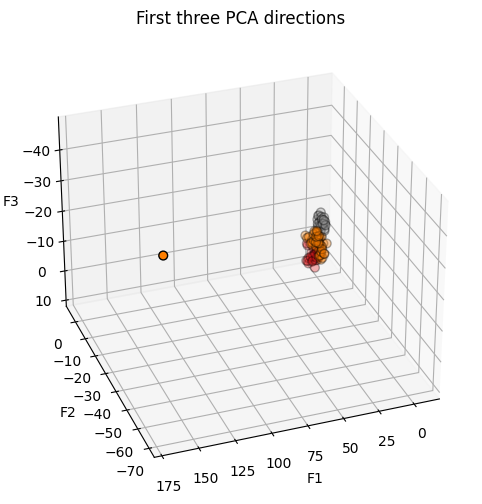

In [84]:
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

In [85]:
fig = px.scatter_3d(x=X_tsne[:,0], y=X_tsne[:,1], z=X_tsne[:, 2],
              color=labels)
fig.show()

In [86]:
def compute_tsne(n_components, learning_rate="auto", perplexity=30) : 

    tsne = TSNE(n_components=n_components, learning_rate=learning_rate, init='random', perplexity=30, n_iter=300)
    X_tsne = tsne.fit_transform(X_norm)
    return X_tsne

In [87]:
tsne_list = []
lr_list = [3, 10, 30, 50, 100, 150, 200, 300, 500]

In [88]:
for lr in lr_list : 
    tsne_list.append(compute_tsne(n_components=2,learning_rate=lr ))

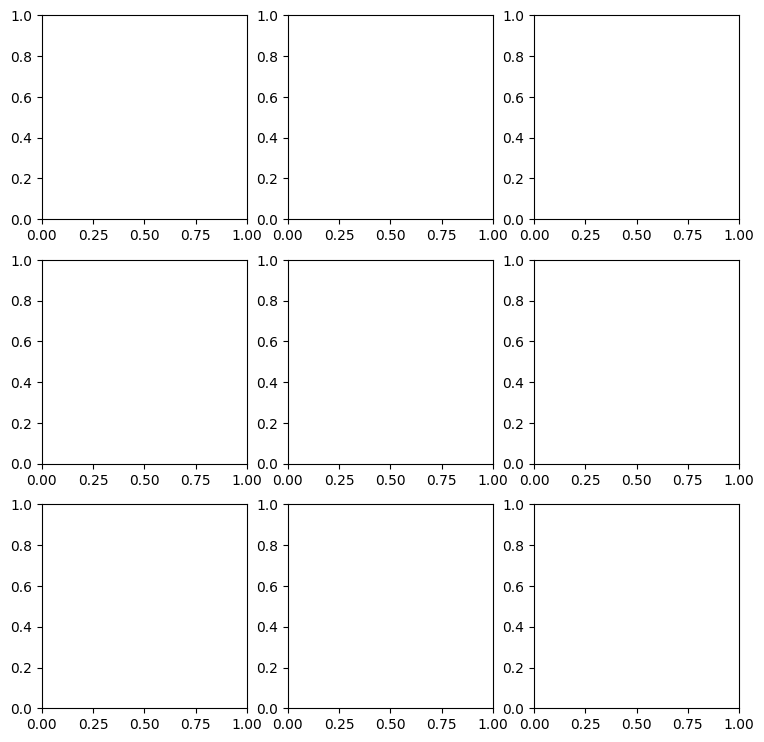

In [89]:
fig, axs = plt.subplots(3, 3, figsize=(9,9))

axs = axs.flatten()

[]

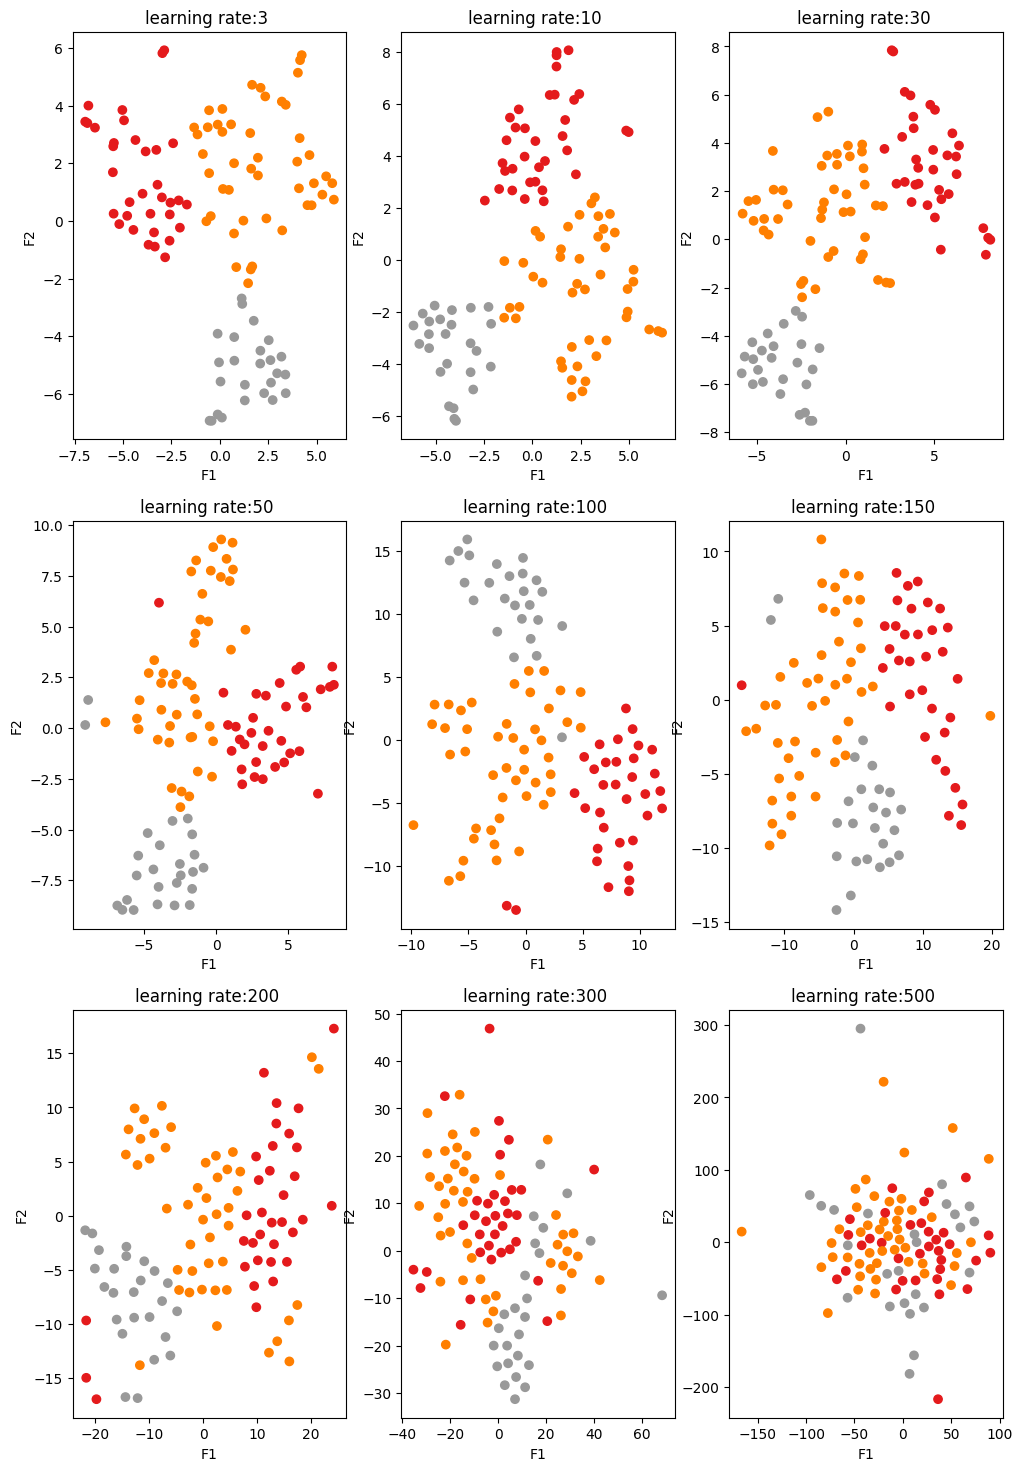

In [90]:
fig, axs = plt.subplots(3, 3, figsize=(12,18))
axs = axs.flatten()

for n, x_tsne, ax in zip(lr_list, tsne_list, axs) : 
    ax.scatter(x_tsne[:, 0], x_tsne[:, 1], c= labels, cmap="Set1")
    ax.set_xlabel("F1")
    ax.set_ylabel("F2")
    ax.set_title(f"learning rate:{n} ")

plt.plot()

=> en fonction du paramètre learning_rate la projection des points, et donc la visualisation, change beaucoup.

*******

## CAH

<font color='deepskyblue'>La Classification Ascendante Hiérarchique (CAH) est une méthode d'analyse de regroupement (clustering) qui vise à regrouper des individus ou des objets en fonction de leurs similarités ou dissimilarités.

Cette méthode est dite "ascendante" car elle construit une hiérarchie de regroupements à partir de la fusion successive des individus ou des groupes les plus similaires.

La construction de la CAH implique les étapes suivantes :

- Étape 1 : Définir la mesure de similarité ou dissimilarité appropriée pour les données (distance euclienne, Manhattan, corrélation etc.)

- Étape 2 : Calculer la matrice de similarité ou dissimilarité entre les individus ou groupes.

- Étape 3 : Initialiser chaque individu ou groupe comme un cluster isolé.

- Étape 4 : Calculer les similarités ou dissimilarités entre tous les clusters.

- Étape 5 : Fusionner les deux clusters les plus similaires (ou les moins dissimilaires) pour former un nouveau cluster.

- Étape 6 : Mettre à jour la matrice de similarité ou dissimilarité en tenant compte du nouveau cluster formé.

- Étape 7 : Répéter les étapes 4 à 6 jusqu'à ce que tous les individus soient regroupés en un seul cluster.

- Étape 8 : Visualiser les résultats à l'aide d'un dendrogramme pour interpréter la structure des regroupements.

</font>

In [91]:
linkage_matrix = linkage(X_norm, method='ward', metric='euclidean') # cette méthode minimise la somme des carrés des écarts au sein des clusters. Elle tente de trouver des regroupements compacts et homogènes en minimisant la distance.
linkage_matrix[:5]

array([[ 87.        ,  91.        ,   0.31400679,   2.        ],
       [ 24.        ,  31.        ,   0.36091537,   2.        ],
       [ 15.        ,  28.        ,   0.3918172 ,   2.        ],
       [  4.        ,  82.        ,   0.41310497,   2.        ],
       [ 73.        , 105.        ,   0.4405843 ,   3.        ]])

### Construction du dendrogramme

=> Méthode du saut maximum : observer les distances verticales entre les fusions de clusters dans le dendrogramme.

=> Il faut rechercher les sauts les plus importants et identifier le niveau de similarité/dissimilarité correspondant. Le nombre de clusters peut être déterminé par le nombre de sauts significatifs dans le dendrogramme.

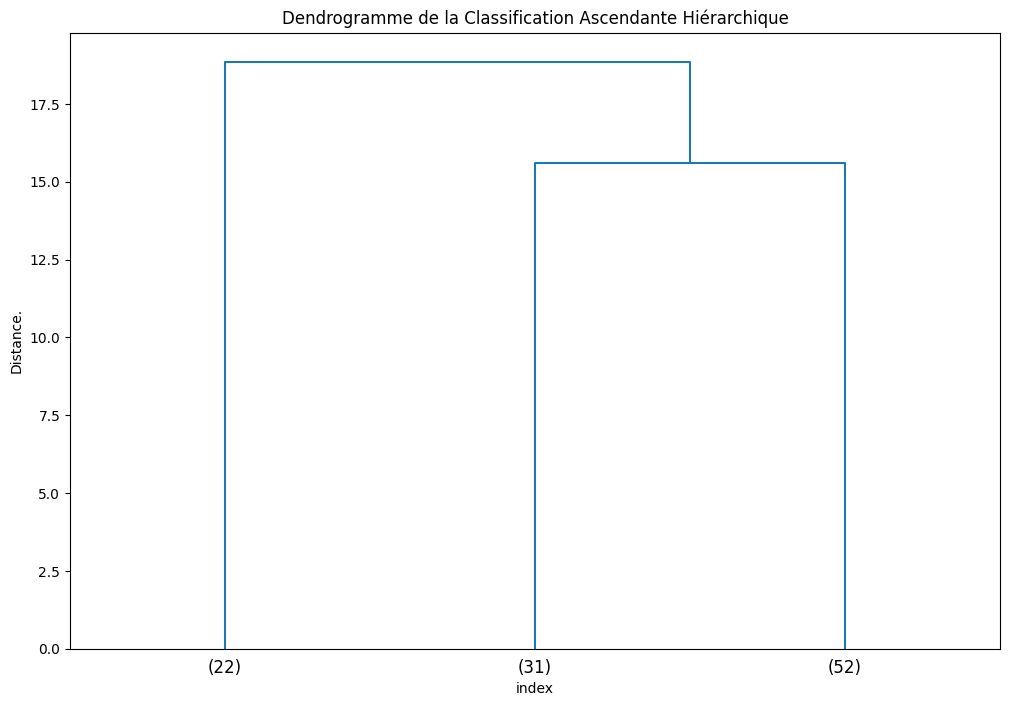

In [102]:
# les arguments p=3, truncate_mode="lastp" signifient que l'on ne va afficher que 3 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(linkage_matrix, p=3, truncate_mode="lastp", ax=ax)

plt.title("Dendrogramme de la Classification Ascendante Hiérarchique")
plt.xlabel("index")
plt.ylabel("Distance.")
plt.show()

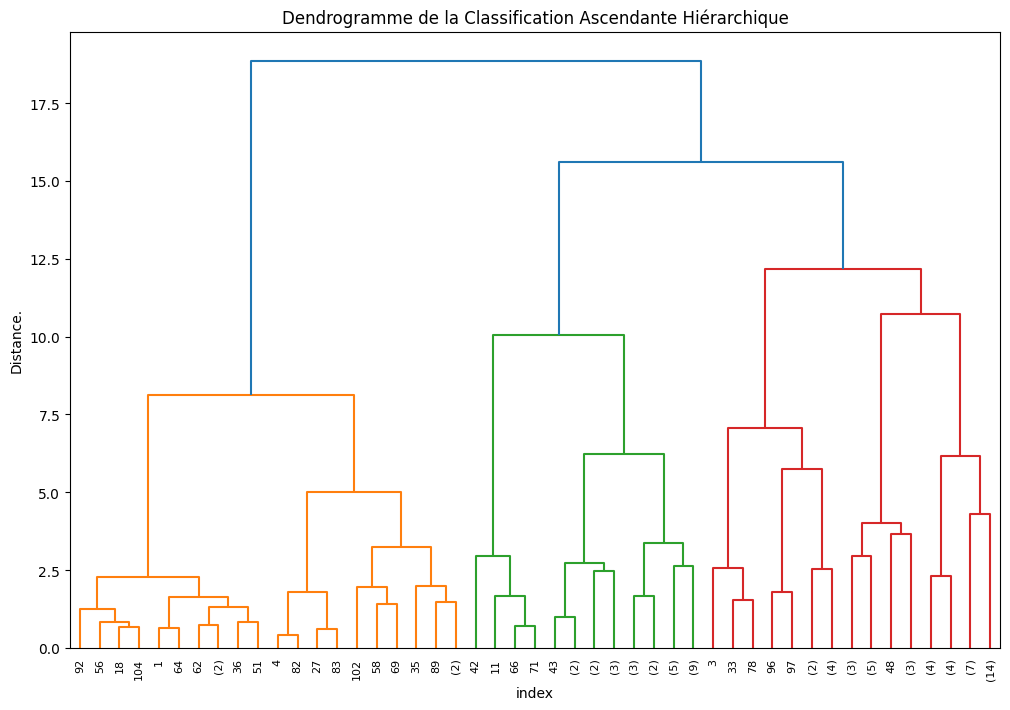

In [105]:
# les arguments p=3, truncate_mode="level" signifient que l'on ne va afficher les clusters selon leurs noeuds/profondeur

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(linkage_matrix, p=5, truncate_mode="level", ax=ax)

plt.title("Dendrogramme de la Classification Ascendante Hiérarchique")
plt.xlabel("index")
plt.ylabel("Distance.")
plt.show()

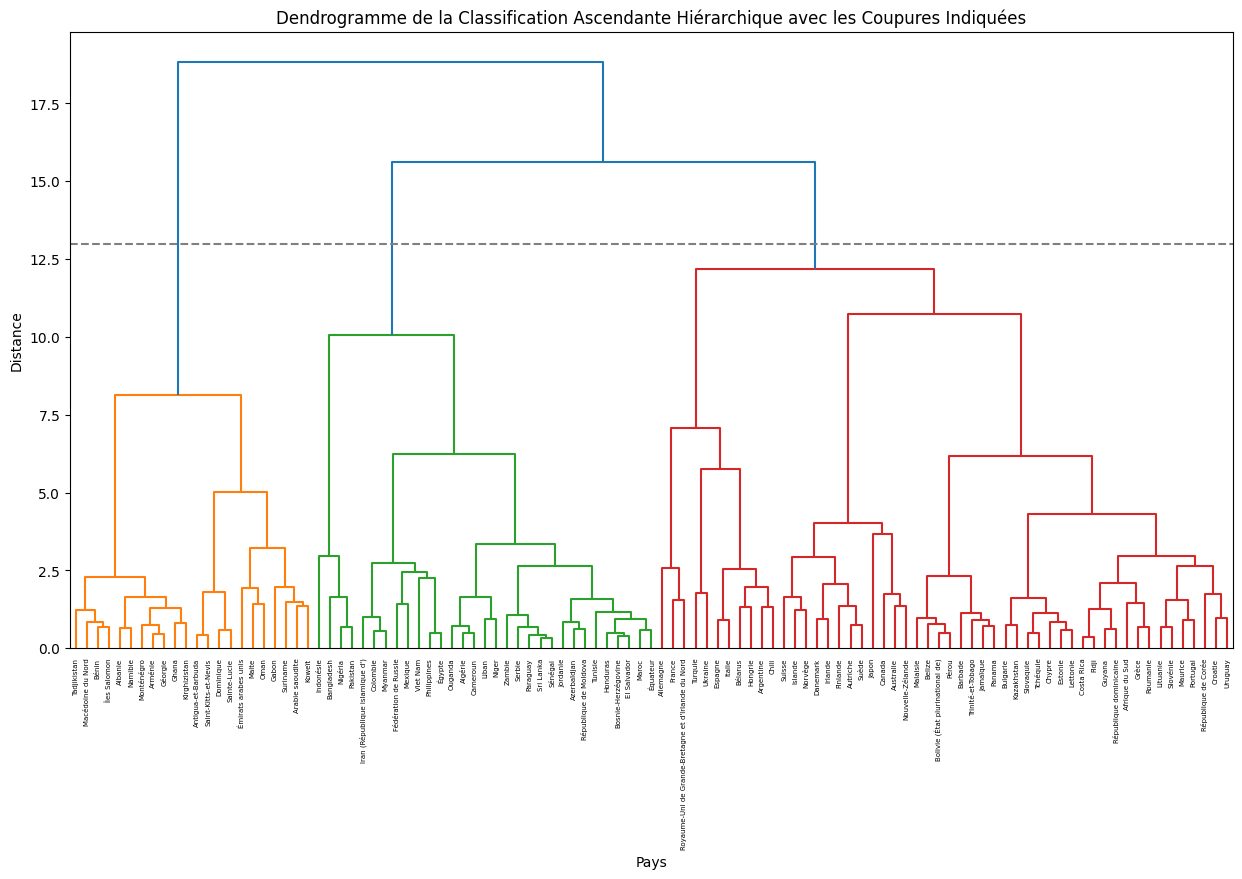

In [103]:
# Affichage du dendrogramme
plt.figure(figsize=(15, 8))

dendrogram(linkage_matrix, labels=X_df.index, leaf_rotation=90)

# Ajout des lignes en pointillé pour les trois sauts les plus importants
plt.axhline(y=13, color='gray', linestyle='--')  # Exemple de ligne pointillée pour le premier saut

plt.title('Dendrogramme de la Classification Ascendante Hiérarchique avec les Coupures Indiquées')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()


Score de silhouette

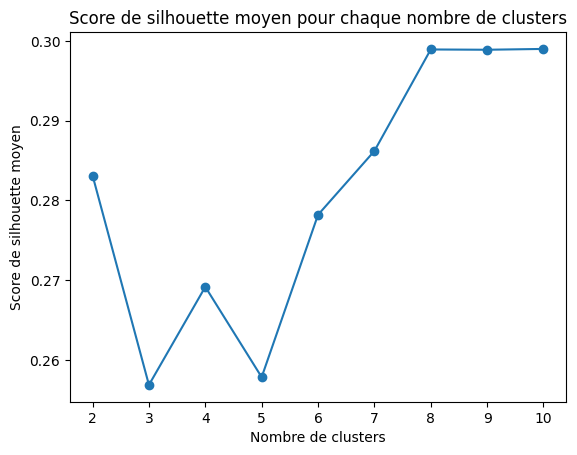

Nombre optimal de clusters : 10


In [109]:
# Effectuer la CAH avec différentes coupes du dendrogramme
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(X_norm, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_norm, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

= > Pour comparer les résultats avec l'algorithme du K-Means, nous allons définir 3 clusters.

On instancie un estimateur et on l'entraîne :

In [111]:
cah = AgglomerativeClustering(n_clusters=3, linkage="ward", metric='euclidean')
cah.fit(X_norm)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [112]:
labels = cah.labels_
labels

array([0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2,
       2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2,
       0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1], dtype=int64)

In [113]:
X_df["cluster_cah"] = labels
X_df.head()

Exportations en kg  population_2017   
Zone                                                      
Afrique du Sud              63000000.0       57009756.0  \
Albanie                            0.0        2884169.0   
Algérie                            0.0       41389189.0   
Allemagne                  646000000.0       82658409.0   
Antigua-et-Barbuda                 0.0          95426.0   

                    indice_stabilite_politique_2017  Valeur US $ par habitant   
Zone                                                                            
Afrique du Sud                                -0.28               6723.928582  \
Albanie                                        0.38               4521.752217   
Algérie                                       -0.92               4134.936055   
Allemagne                                      0.59              44670.222282   
Antigua-et-Barbuda                             0.75              16110.556281   

                          TAS         TDI  Consommation_moyenne_poulet_en_kg   
Zone                                                                           
Afrique du Sud      78.706327   23.567171                          37.151536  \
Albanie             25.490196   74.509804                          17.682736   
Algérie             99.277978    0.722022                           6.692569   
Allemagne           88.538012   35.738540                          20.687550   
Antigua-et-Barbuda   0.000000  100.000000                          73.355270   

                    labels_kmeans  cluster_cah  
Zone                                            
Afrique du Sud                  0            0  
Albanie                         2            1  
Algérie                         0            2  
Allemagne                       1            0  
Antigua-et-Barbuda              2            1

In [114]:
X_df.head(2)

Exportations en kg  population_2017   
Zone                                                  
Afrique du Sud          63000000.0       57009756.0  \
Albanie                        0.0        2884169.0   

                indice_stabilite_politique_2017  Valeur US $ par habitant   
Zone                                                                        
Afrique du Sud                            -0.28               6723.928582  \
Albanie                                    0.38               4521.752217   

                      TAS        TDI  Consommation_moyenne_poulet_en_kg   
Zone                                                                      
Afrique du Sud  78.706327  23.567171                          37.151536  \
Albanie         25.490196  74.509804                          17.682736   

                labels_kmeans  cluster_cah  
Zone                                        
Afrique du Sud              0            0  
Albanie                     2            1

Visualiser les clusters dans la CAH

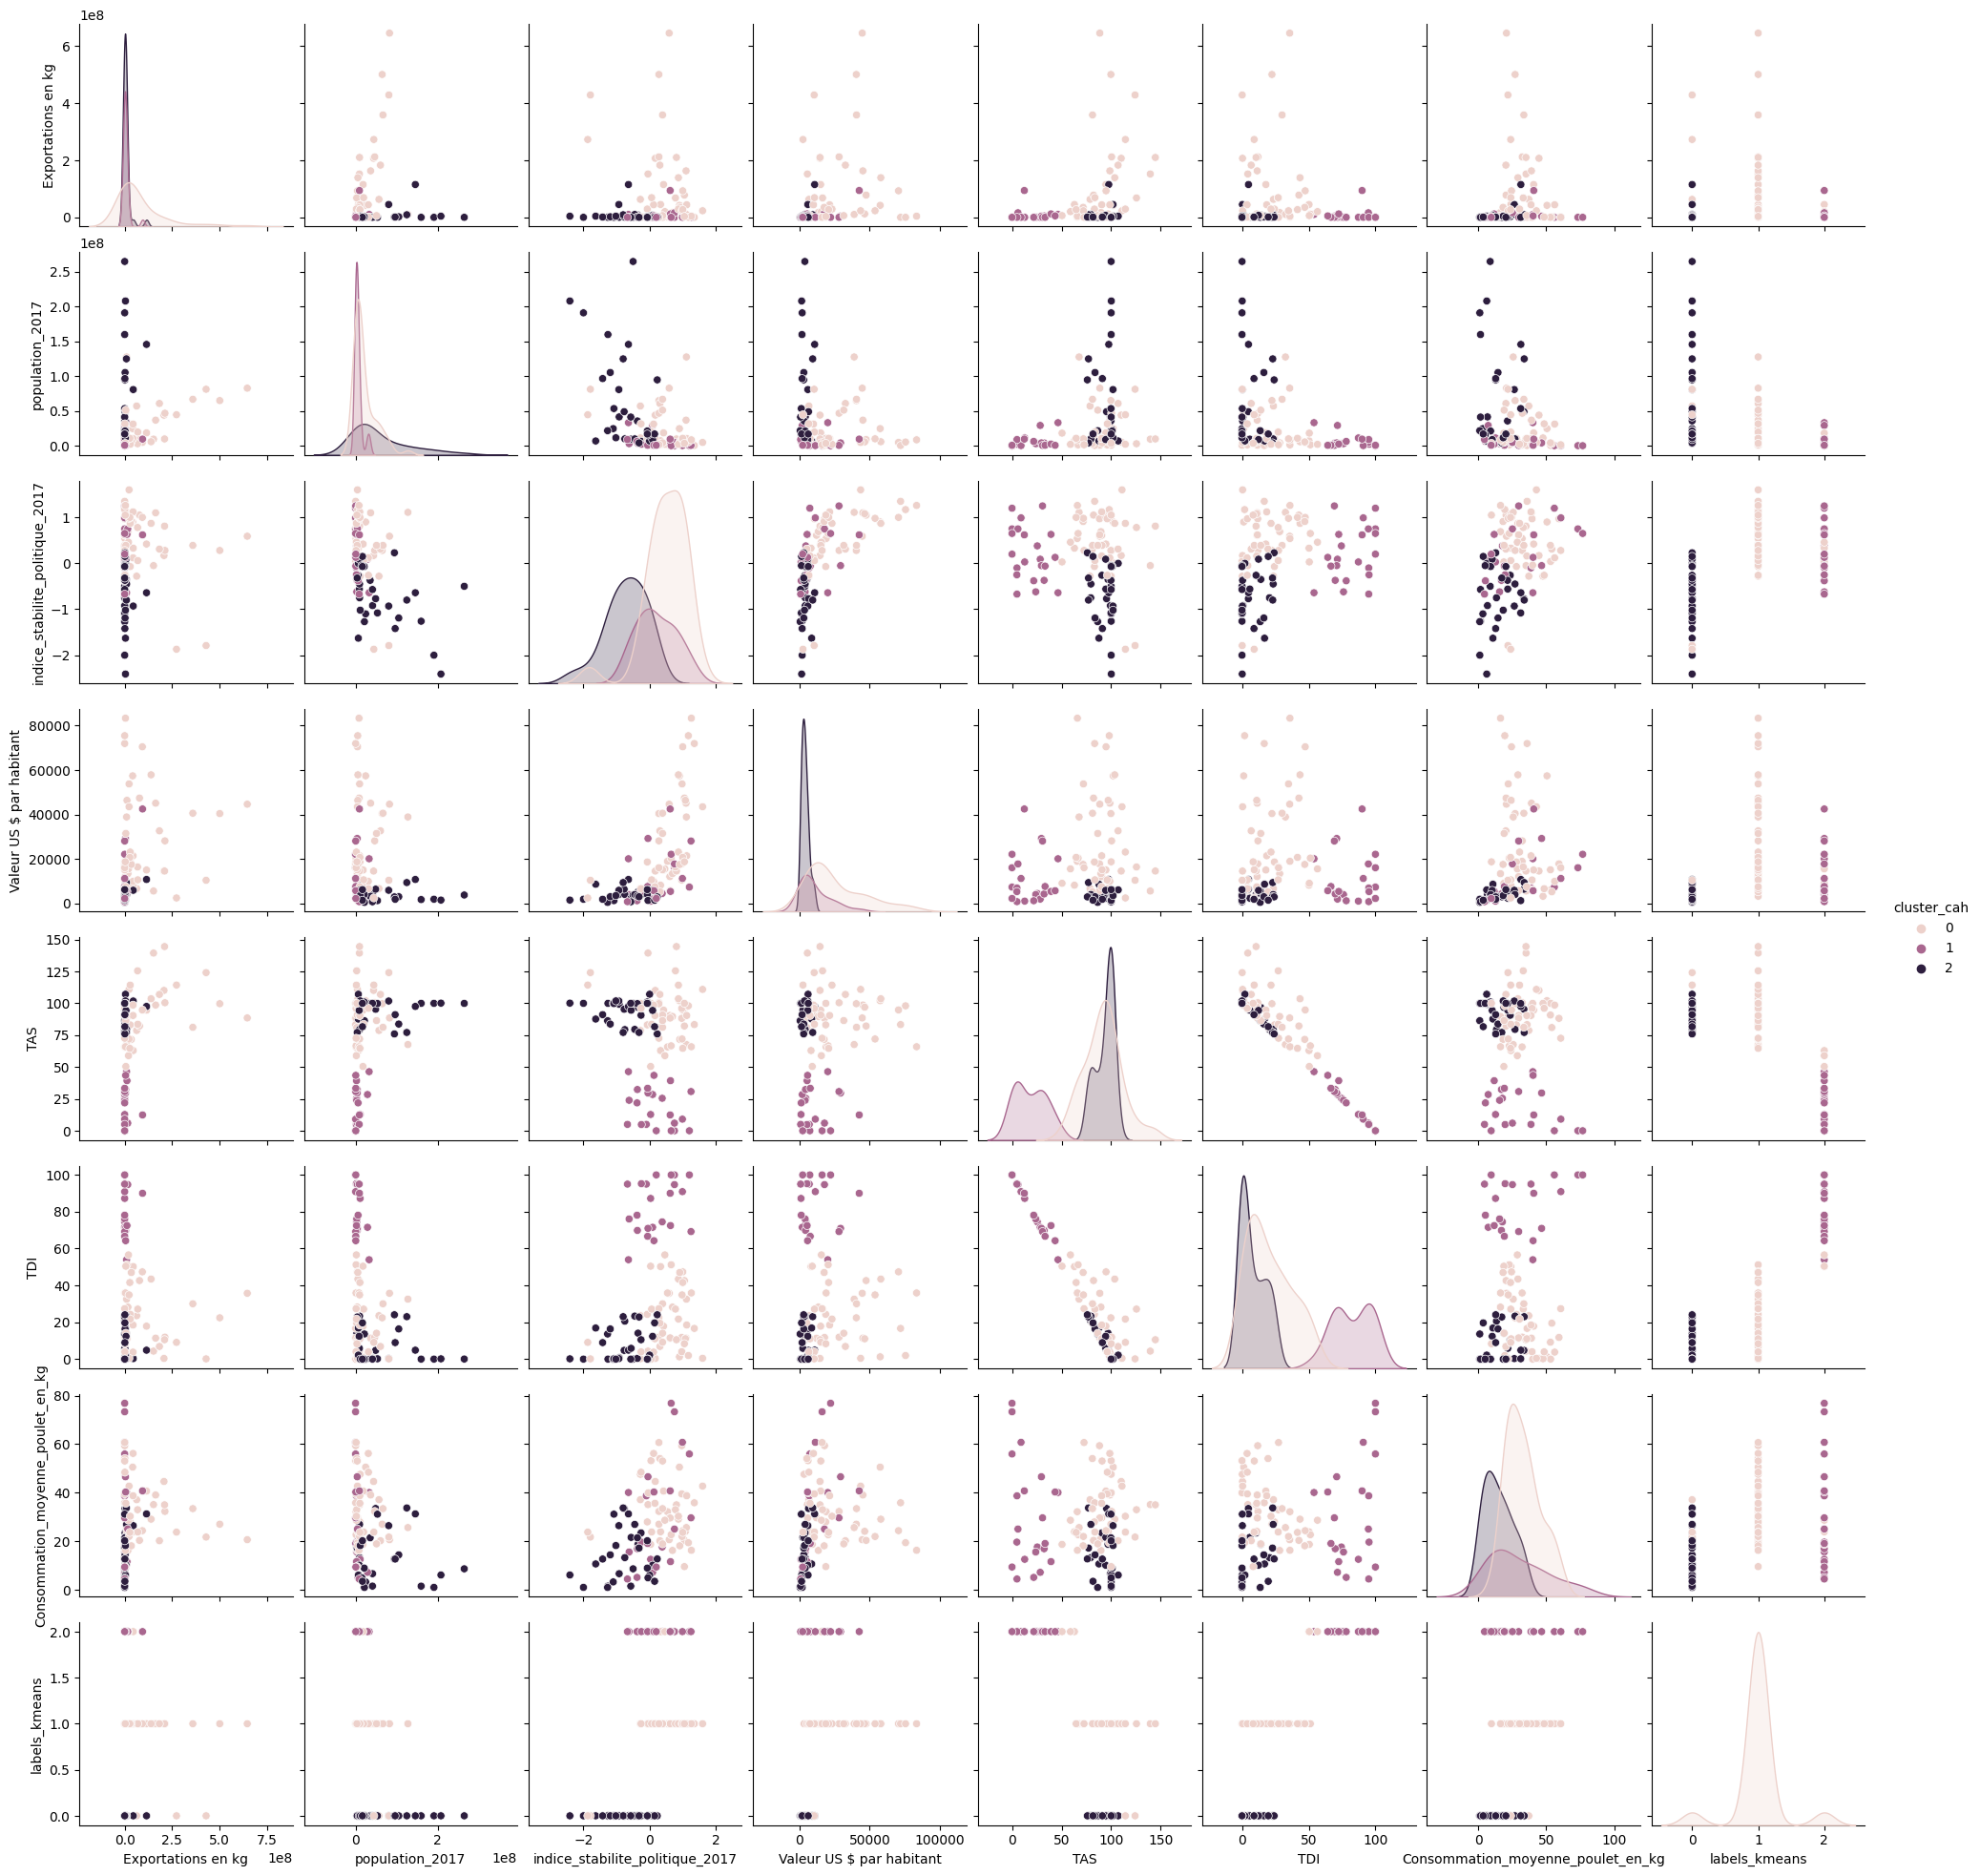

In [115]:
sns.pairplot(X_df, hue="cluster_cah")

Statistiques descriptives

In [116]:
# Afficher les statistiques des clusters
cluster_stats = X_df.groupby('cluster_cah').mean()
cluster_stats

Exportations en kg  population_2017   
cluster_cah                                        
0                  8.467308e+07     2.075284e+07  \
1                  6.681889e+06     5.715278e+06   
2                  7.193575e+06     6.077118e+07   

             indice_stabilite_politique_2017  Valeur US $ par habitant   
cluster_cah                                                              
0                                   0.489038              25686.368563  \
1                                   0.205909              11198.434357   
2                                  -0.719032               3923.580975   

                   TAS        TDI  Consommation_moyenne_poulet_en_kg   
cluster_cah                                                            
0            91.662165  20.547374                          32.620124  \
1            18.639595  82.541653                          30.363744   
2            93.552381   7.929384                          14.588184   

             labels_kmeans  
cluster_cah                 
0                      1.0  
1                      2.0  
2                      0.0

In [117]:
# Créer un dictionnaire pour stocker les pays de chaque cluster
pays_par_cluster = {}

# Regrouper les noms des pays pour chaque cluster
for groupe, data in X_df.groupby('cluster_cah'):
    pays_par_cluster[groupe] = data.index.tolist()

# Afficher la liste des pays pour chaque cluster
for groupe, pays in pays_par_cluster.items():
    print(f"Cluster {groupe} : {pays}")


Cluster 0 : ['Afrique du Sud', 'Allemagne', 'Argentine', 'Australie', 'Autriche', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Bulgarie', 'Bélarus', 'Canada', 'Chili', 'Chypre', 'Costa Rica', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Fidji', 'Finlande', 'France', 'Grèce', 'Guyana', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Jamaïque', 'Japon', 'Kazakhstan', 'Lettonie', 'Lituanie', 'Malaisie', 'Maurice', 'Norvège', 'Nouvelle-Zélande', 'Panama', 'Portugal', 'Pérou', 'Roumanie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République de Corée', 'République dominicaine', 'Slovaquie', 'Slovénie', 'Suisse', 'Suède', 'Tchéquie', 'Trinité-et-Tobago', 'Turquie', 'Ukraine', 'Uruguay']
Cluster 1 : ['Albanie', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Arménie', 'Bénin', 'Dominique', 'Gabon', 'Ghana', 'Géorgie', 'Kirghizistan', 'Koweït', 'Macédoine du Nord', 'Malte', 'Monténégro', 'Namibie', 'Oman', 'Saint-Kitts-et-Nevis', 'Sainte-Lucie', 'Suriname', 'Tadjikistan', 'Émir

Caractéristiques de chaque groupe

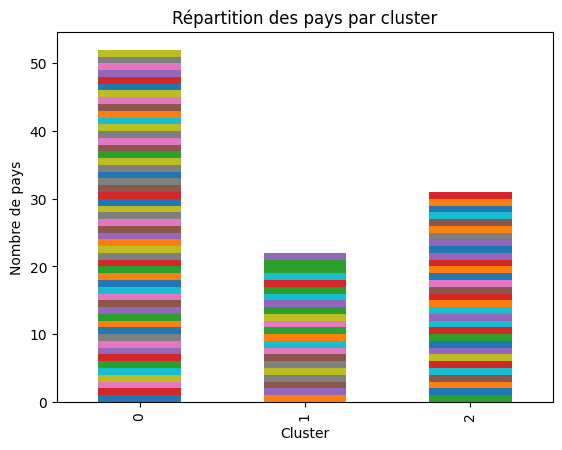

In [118]:
# Créer une table de contingence entre cluster_label et index des pays
contingency_table = pd.crosstab(X_df['cluster_cah'], X_df.index)

# Tracer le barplot
ax = contingency_table.plot(kind='bar', stacked=True)

# Supprimer la légende
ax.legend_.remove()

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de pays')
plt.title('Répartition des pays par cluster')

# Afficher le graphique
plt.show()


In [119]:
# Sélectionner uniquement les colonnes numériques
df_numeric = X_df.select_dtypes(include=[np.number])

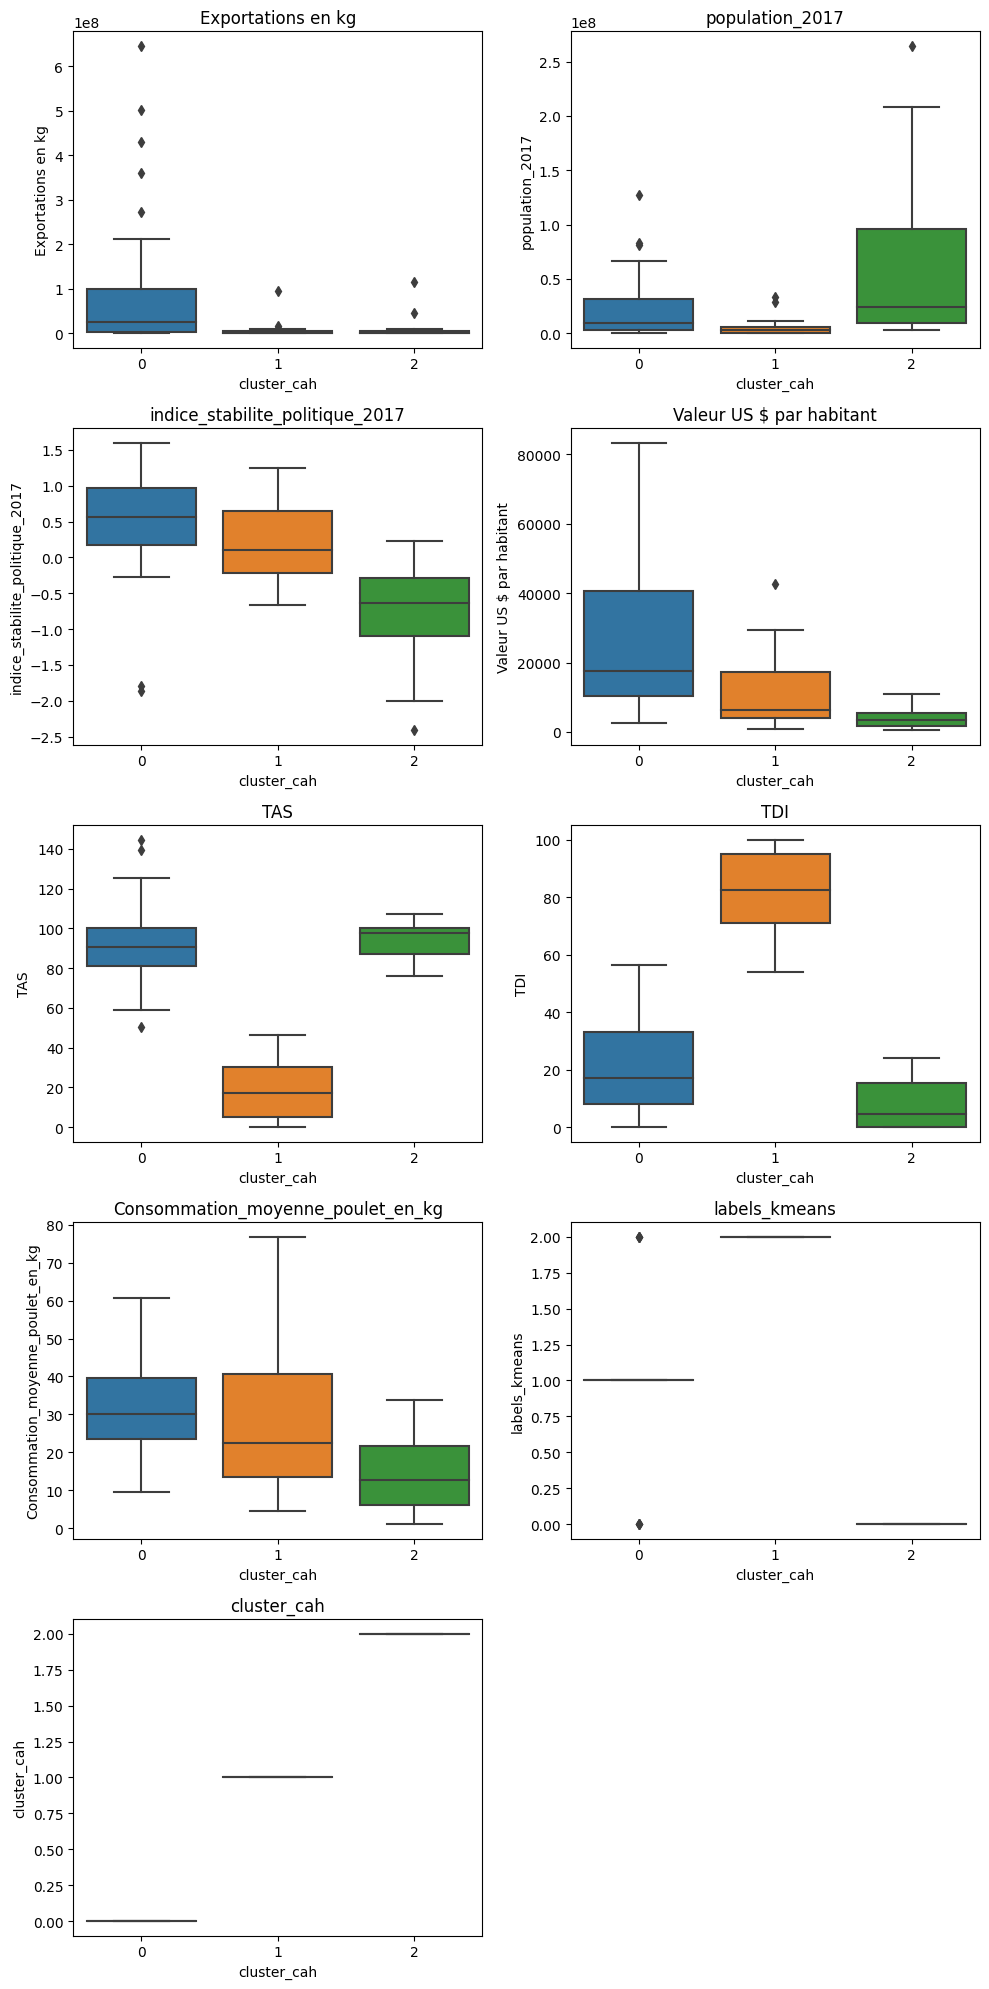

In [120]:
num_cols = len(df_numeric.columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_cah', y=column, data=X_df)
    plt.title(column)

plt.tight_layout()
plt.show()


In [121]:
# Calculer le score de silhouette
silhouette_avg = silhouette_score(X_norm, clusters)
print("Score de silhouette :", silhouette_avg)

Score de silhouette : 0.29901171058262244


=> Le score de silhouette est une mesure de la qualité d'un regroupement (clustering). Il mesure à quel point chaque point d'un cluster est proche des points de son propre cluster par rapport aux points des autres clusters. Le score de silhouette va de -1 à 1

=> Dans notre cas, un Score de silhouette à 0.30 suggère que les clusters sont cohérents et distincts. La plupart des points de données sont bien regroupés à l'intérieur de leur cluster.

- Les points à l'intérieur de chaque cluster sont en moyenne plus proches les uns des autres que des points d'autres clusters.

- Il y a une certaine séparation entre les clusters, mais il peut y avoir un certain chevauchement entre les clusters voisins.

- Globalement, les clusters sont cohérents et distincts, mais il peut y avoir des zones de similarité ou de confusion entre certains clusters.

Un score de silhouette de 0,30 est généralement considéré comme raisonnable et indique une structure identifiable dans nos données. 

=> Notre algorithme de clustering a réussi à identifier des clusters distincts dans nos données.